<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Bangkok Housing Price Prediction

## Problem Statement

Bangkok housing data available in Kaggle challenge presents the data of each housing item including its features and its pricing. The objective of this project is to create the appropriate model that will be able to predict the housing price with the best optimal score for the real-estate price calculator app. 

## Libraries Importing

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import KNNImputer
from yellowbrick.regressor import ResidualsPlot


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

## Data Importing and Cleaning

In [2]:
# Read train.json data into train_df
train_df = pd.read_json('train.json')


In [3]:
# Get information of train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14271 non-null  int64  
 1   province                 14271 non-null  object 
 2   district                 14271 non-null  object 
 3   subdistrict              14260 non-null  object 
 4   address                  14271 non-null  object 
 5   property_type            14271 non-null  object 
 6   total_units              10509 non-null  float64
 7   bedrooms                 14228 non-null  float64
 8   baths                    14236 non-null  float64
 9   floor_area               14271 non-null  int64  
 10  floor_level              8093 non-null   float64
 11  land_area                4917 non-null   float64
 12  latitude                 14271 non-null  float64
 13  longitude                14271 non-null  float64
 14  nearby_stations       

In [4]:
# Show train_df head
train_df.head()

id    province           district        subdistrict  \
0   8448321     Bangkok           Watthana  Phra Khanong Nuea   
1  10936325     Bangkok           Watthana   Khlong Toei Nuea   
2  10927931     Bangkok        Khlong Toei         Khlong Tan   
3  11004792  Nonthaburi         Bang Kruai     Bang Khun Kong   
4  10757452  Nonthaburi  Mueang Nonthaburi          Bang Phai   

                            address   property_type  total_units  bedrooms  \
0  36 Soi Sukhumvit 63, Ekamai Road           Condo        273.0       2.0   
1                       31 สุขุมวิท           Condo         74.0       1.0   
2  68 Sukhumvit 24 Alley, Khong Tan           Condo        940.0       1.0   
3                    Bang Khun Kong  Detached House          NaN       3.0   
4                 พระราม5-นครอินทร์       Townhouse          NaN       3.0   

   baths  floor_area  ...   longitude  nearby_stations  \
0    2.0          66  ...  100.584850                2   
1    1.0          49  ...  100.566949                3   
2    1.0          34  ...  100.565660                2   
3    3.0         170  ...  100.428438                0   
4    2.0         120  ...  100.494129                1   

                             nearby_station_distance  nearby_bus_stops  \
0    [[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]               NaN   
1  [[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...               NaN   
2  [[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...               NaN   
3                                               None               NaN   
4                 [[PP09 Yaek Nonthaburi 1 MRT, 10]]               NaN   

   nearby_supermarkets nearby_shops  year_built  month_built  \
0                 16.0           20        2011         June   
1                 11.0           20        2012    September   
2                 20.0           20        2017      January   
3                  2.0            4           0         None   
4                  6.0           15           0         None   

                                          facilities    price  
0  [Car Park, Community Garden, CCTV, Fitness cor...  8500000  
1  [CCTV, Fitness corner, 24 hours security, Swim...  5900000  
2  [Car Park, Clubhouse, Community Garden, CCTV, ...  6290000  
3  [Covered car park, Playground, 24 hours securi...  8900000  
4              [Covered car park, 24 hours security]  2390000  

[5 rows x 23 columns]

In [5]:
# Describe train_df
train_df.describe(include='all')

id province           district   subdistrict  \
count   1.427100e+04    14271              14271         14260   
unique           NaN        3                 58           239   
top              NaN  Bangkok  Mueang Nonthaburi  Samrong Nuea   
freq             NaN     9130               1174           465   
mean    1.062614e+07      NaN                NaN           NaN   
std     8.030103e+05      NaN                NaN           NaN   
min     1.025114e+06      NaN                NaN           NaN   
25%     1.064588e+07      NaN                NaN           NaN   
50%     1.086984e+07      NaN                NaN           NaN   
75%     1.097710e+07      NaN                NaN           NaN   
max     1.104790e+07      NaN                NaN           NaN   

               address property_type   total_units      bedrooms  \
count            14271         14271  10509.000000  14228.000000   
unique            2619             3           NaN           NaN   
top     Sukhumvit Road         Condo           NaN           NaN   
freq               177          9206           NaN           NaN   
mean               NaN           NaN    712.655438      1.880728   
std                NaN           NaN    554.558340      1.092817   
min                NaN           NaN      1.000000      1.000000   
25%                NaN           NaN    318.000000      1.000000   
50%                NaN           NaN    554.000000      1.000000   
75%                NaN           NaN    945.000000      3.000000   
max                NaN           NaN   4000.000000     10.000000   

               baths    floor_area  ...     longitude  nearby_stations  \
count   14236.000000  14271.000000  ...  14271.000000     14271.000000   
unique           NaN           NaN  ...           NaN              NaN   
top              NaN           NaN  ...           NaN              NaN   
freq             NaN           NaN  ...           NaN              NaN   
mean        1.618292     79.867283  ...    100.565017         0.956415   
std         0.872875     69.701181  ...      0.089575         1.085255   
min         0.000000      1.000000  ...    100.273931         0.000000   
25%         1.000000     32.000000  ...    100.512628         0.000000   
50%         1.000000     47.000000  ...    100.569721         1.000000   
75%         2.000000    112.000000  ...    100.608786         2.000000   
max         9.000000    766.000000  ...    100.905485         3.000000   

                                  nearby_station_distance  nearby_bus_stops  \
count                                                7228       6009.000000   
unique                                               1146               NaN   
top     [[PP10 Bang Krasor MRT, 260], [PP09 Yaek Nonth...               NaN   
freq                                                   56               NaN   
mean                                                  NaN         14.049426   
std                                                   NaN          6.496828   
min                                                   NaN          1.000000   
25%                                                   NaN          8.000000   
50%                                                   NaN         17.000000   
75%                                                   NaN         20.000000   
max                                                   NaN         20.000000   

        nearby_supermarkets  nearby_shops    year_built  month_built  \
count          13885.000000  14271.000000  14271.000000         8397   
unique                  NaN           NaN           NaN           12   
top                     NaN           NaN           NaN         June   
freq                    NaN           NaN           NaN         1568   
mean               9.002161     10.447060   1422.737440          NaN   
std                5.348001      6.950903    917.737592          NaN   
min                1.000000      1.000000      0.000000          N

In [6]:
# Print out shape of train_df
train_df.shape

(14271, 23)

In [7]:
# Print out shape of train_df object
train_obj = train_df.select_dtypes(include=['object'])
train_obj.shape

(14271, 8)

In [8]:
# Null values validation
train_df.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                3762
bedrooms                     43
baths                        35
floor_area                    0
floor_level                6178
land_area                  9354
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    7043
nearby_bus_stops           8262
nearby_supermarkets         386
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
dtype: int64

## Feature Engineering

In [9]:
# Save bangkok_district data into dist
dist = pd.read_csv('bangkok_district.csv')

In [10]:
# Merge train_df with dist using inner join to filter out the districts in each file that is not matched, save the file as train_df2
train_df2 = pd.merge(left=train_df, right=dist[['district','subdistrict']], how='inner', on=['district','subdistrict'])
train_df2.shape

(13787, 23)

In [11]:
# Print out train_df2 columns
train_df2.columns

Index(['id', 'province', 'district', 'subdistrict', 'address', 'property_type',
       'total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level',
       'land_area', 'latitude', 'longitude', 'nearby_stations',
       'nearby_station_distance', 'nearby_bus_stops', 'nearby_supermarkets',
       'nearby_shops', 'year_built', 'month_built', 'facilities', 'price'],
      dtype='object')

In [12]:
# Encode district rank based on price into district column

# Group district by price mean, sort ascending
district_order = train_df2.groupby('district')['price'].mean().sort_values(ascending=True).index

# Create dictionary of district and rank
district_encode_dict = {sub:i for i, sub in enumerate(district_order)}

# Encode district column with the encode dictionary
train_df2['district'] = train_df2['district'].map(district_encode_dict)

In [154]:
# Check district_encode_dict
district_encode_dict

{'Bang Bo': 0,
 'Sai Noi': 1,
 'Chom Thong': 2,
 'Mueang Samut Prakan': 3,
 'Rat Burana': 4,
 'Bang Bua Thong': 5,
 'Phasi Charoen': 6,
 'Nong Chok': 7,
 'Taling Chan': 8,
 'Mueang Nonthaburi': 9,
 'Bangkok Noi': 10,
 'Bang Sue': 11,
 'Suan Luang': 12,
 'Bang Sao Thong': 13,
 'Bang Kapi': 14,
 'Thon Buri': 15,
 'Bang Yai': 16,
 'Bang Na': 17,
 'Bang Khen': 18,
 'Bang Phlat': 19,
 'Lat Krabang': 20,
 'Bueng Kum': 21,
 'Don Mueang': 22,
 'Nong Khaem': 23,
 'Bang Khae': 24,
 'Khlong Sam Wa': 25,
 'Bang Bon': 26,
 'Wang Thonglang': 27,
 'Pak Kret': 28,
 'Min Buri': 29,
 'Bang Khun Thian': 30,
 'Bangkok Yai': 31,
 'Khan Na Yao': 32,
 'Yan Nawa': 33,
 'Lak Si': 34,
 'Din Daeng': 35,
 'Chatuchak': 36,
 'Thung Khru': 37,
 'Huai Khwang': 38,
 'Bang Phli': 39,
 'Prawet': 40,
 'Phra Khanong': 41,
 'Bang Kruai': 42,
 'Lat Phrao': 43,
 'Sai Mai': 44,
 'Saphan Sung': 45,
 'Phra Pradaeng': 46,
 'Khlong San': 47,
 'Bang Kho Laem': 48,
 'Phaya Thai': 49,
 'Thawi Watthana': 50,
 'Sathon': 51,
 'Khlong T

In [13]:
# Encode subdistrict rank based on price into subdistrict column

# Group subdistrict by price mean, sort ascending
subdistrict_order = train_df2.groupby('subdistrict')['price'].mean().sort_values(ascending=True).index

# Create dictionary of subdistrict and rank
subdistrict_encode_dict = {sub:i for i, sub in enumerate(subdistrict_order)}

# Encode subdistrict column with the encode dictionary
train_df2['subdistrict'] = train_df2['subdistrict'].map(subdistrict_encode_dict)

In [152]:
# Encode province rank based on price into province column

# Group province by price mean, sort ascending
province_order = train_df2.groupby('province')['price'].mean().sort_values(ascending=True).index

# Create dictionary of province and rank
province_encode_dict = {sub:i for i, sub in enumerate(province_order)}

# Encode province column with the encode dictionary
train_df2['province'] = train_df2['province'].map(province_encode_dict)

In [150]:
# Check province_encode_dict
province_encode_dict

{'Nonthaburi': 0, 'Samut Prakan': 1, 'Bangkok': 2}

In [15]:
# Encode property_type rank based on price into property_type column

# Group property type by price mean, sort ascending
property_type_order = train_df2.groupby('property_type')['price'].mean().sort_values(ascending=True).index

# Create dictionary of property type and rank
property_type_encode_dict = {sub:i for i, sub in enumerate(property_type_order)}

# Encode property type column with the encode dictionary
train_df2['property_type'] = train_df2['property_type'].map(property_type_encode_dict)

In [153]:
# Check province_encode_dict
property_type_encode_dict

{'Townhouse': 0, 'Condo': 1, 'Detached House': 2}

In [16]:
# Encode month_built column with numeric value
train_df2['month_built'] = train_df2['month_built'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

In [17]:
# Create count_facilities to count the number of facilities in facilities column
train_df2['count_facilities'] = train_df2['facilities'].str.len()


In [18]:
# Creat closest_station_name column and closest_station_distance column

# Define closest_station function
def closest_station(station_list, return_value='station_name'):

    # If-else
    if type(station_list) != list:
        if return_value == 'station_name':
            return "NO STATION"
        elif return_value == 'station_distance':
            return 2000
    else:
        if return_value == 'station_name':
            return station_list[0][0]
        elif return_value == 'station_distance':
            return station_list[0][1]
            
# Create two new columns
train_df2['closest_station_name'] = train_df2.nearby_station_distance.apply(lambda x: closest_station(x, 'station_name'))
train_df2['closest_station_distance'] = train_df2.nearby_station_distance.apply(lambda x: closest_station(x, 'station_distance'))

In [159]:
# Check closest_station_name and closest_station_distance
train_df2[['nearby_station_distance', 'closest_station_name', 'closest_station_distance']].head()

nearby_station_distance closest_station_name  \
0    [[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]       E7 Ekkamai BTS   
1    [[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]       E7 Ekkamai BTS   
2                             [[E9 On Nut BTS, 110]]        E9 On Nut BTS   
3                             [[E9 On Nut BTS, 680]]        E9 On Nut BTS   
4  [[E8 Phra Khanong BTS, 310], [E7 Ekkamai BTS, ...  E8 Phra Khanong BTS   

   closest_station_distance  
0                       270  
1                       270  
2                       110  
3                       680  
4                       310

In [20]:
# Check train_df2 info
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13787 entries, 0 to 13786
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        13787 non-null  int64  
 1   province                  13787 non-null  int64  
 2   district                  13787 non-null  int64  
 3   subdistrict               13787 non-null  int64  
 4   address                   13787 non-null  object 
 5   property_type             13787 non-null  int64  
 6   total_units               10211 non-null  float64
 7   bedrooms                  13746 non-null  float64
 8   baths                     13754 non-null  float64
 9   floor_area                13787 non-null  int64  
 10  floor_level               7895 non-null   float64
 11  land_area                 4658 non-null   float64
 12  latitude                  13787 non-null  float64
 13  longitude                 13787 non-null  float64
 14  nearby

In [21]:
# Check train_df2 null values
train_df2.isnull().sum()

id                             0
province                       0
district                       0
subdistrict                    0
address                        0
property_type                  0
total_units                 3576
bedrooms                      41
baths                         33
floor_area                     0
floor_level                 5892
land_area                   9129
latitude                       0
longitude                      0
nearby_stations                0
nearby_station_distance     6754
nearby_bus_stops            7998
nearby_supermarkets          366
nearby_shops                   0
year_built                     0
month_built                 5612
facilities                     0
price                          0
count_facilities               0
closest_station_name           0
closest_station_distance       0
dtype: int64

## EDA

In [22]:
# Create column saleprice that takes log of price in train_df2 and train_df dataframes
train_df2['saleprice'] = np.log1p(train_df2['price'])
train_df['saleprice'] = np.log1p(train_df['price'])


In [23]:
# Display saleprice of property_type

# Group property type by saleprice
grouped_property_type = train_df.groupby('property_type')[['saleprice']].mean()

# Sort property type by saleprice
grouped_property_type.sort_values(by='saleprice', ascending=True)

saleprice
property_type            
Townhouse       14.901999
Condo           15.015551
Detached House  15.465816

In [24]:
# Display top 10 districts with highest saleprice

# Group district type by saleprice
grouped_district = train_df.groupby('district')['saleprice'].mean()

# Sort district by saleprice
top_10_districts = grouped_district.sort_values(ascending=False).head(10)

pd.DataFrame(top_10_districts)

saleprice
district                 
Bang Rak        15.708484
Pathum Wan      15.693891
Ratchathewi     15.572565
Watthana        15.551159
Khlong Toei     15.501515
Sathon          15.463615
Bang Kho Laem   15.444222
Phaya Thai      15.393505
Khlong San      15.374015
Thawi Watthana  15.361613

In [25]:
# Display top 10 districts with lowest saleprice

# Group district type by saleprice
grouped_district = train_df.groupby('district')['saleprice'].mean()

# Sort district by saleprice
top_10_districts = grouped_district.sort_values(ascending=True).head(10)

pd.DataFrame(top_10_districts)

saleprice
district                      
Bang Bo              14.590577
Chom Thong           14.657180
Sai Noi              14.665736
Bang Bua Thong       14.713406
Mueang Samut Prakan  14.717582
Rat Burana           14.718682
Phasi Charoen        14.742522
Mueang Nonthaburi    14.744716
Taling Chan          14.771354
Phra Samut Jadee     14.783989

In [26]:
# Display number of bedrooms by saleprice

# Group bedrooms by saleprice
grouped_bedroom = pd.DataFrame(train_df2.groupby(['bedrooms'])['saleprice'].mean())

# Sort bedrooms by saleprice
top_10_bedroom = grouped_bedroom.sort_values(by='saleprice', ascending=False).head(10)
top_10_bedroom

saleprice
bedrooms           
6.0       15.630790
5.0       15.552675
7.0       15.539077
9.0       15.404475
8.0       15.366126
4.0       15.358923
10.0      15.222124
2.0       15.208586
3.0       15.195864
1.0       14.913156

In [27]:
# Display number of bathrooms by saleprice

# Group baths by saleprice
grouped_baths = pd.DataFrame(train_df2.groupby(['baths'])['saleprice'].mean())

# Sort baths by saleprice
top_10_baths = grouped_baths.sort_values(by='saleprice', ascending=False).head(10)
top_10_baths

saleprice
baths           
5.0    15.699453
4.0    15.602076
6.0    15.582263
3.0    15.468476
7.0    15.340844
8.0    15.256546
2.0    15.077481
1.0    14.938299
9.0    14.910784
0.0    14.606599

In [28]:
# Display number of floor level by saleprice

# Group floorlevel by saleprice
grouped_floorlevel = pd.DataFrame(train_df2.groupby(['floor_level'])['saleprice'].mean())

# Sort floorlevel by saleprice
top_10_floorlevel = grouped_floorlevel.sort_values(by='saleprice', ascending=False).head(10)
top_10_floorlevel

saleprice
floor_level           
42.0         15.690466
40.0         15.562966
41.0         15.545008
36.0         15.544471
39.0         15.485321
44.0         15.473238
37.0         15.470559
45.0         15.415418
33.0         15.404331
38.0         15.392037

In [29]:
# Display floor area by saleprice

# Group floorarea by saleprice
grouped_floorarea = pd.DataFrame(train_df2.groupby(['floor_area'])['saleprice'].mean())

# Sort floorarea by saleprice
top_10_floorarea = grouped_floorarea.sort_values(by='saleprice', ascending=False).head(10)
top_10_floorarea

saleprice
floor_area           
517         16.097893
305         16.097893
273         16.066802
560         16.033627
267         16.011624
700         16.001562
551         16.001562
269         16.001562
370         15.955577
355         15.954400

In [30]:
# Display number of nearby stations by saleprice

# Group nearbystations by saleprice
grouped_nearbystations = pd.DataFrame(train_df2.groupby(['nearby_stations'])['saleprice'].mean())

# Sort nearbystations by saleprice
top_10_nearbystations = grouped_nearbystations.sort_values(by='saleprice', ascending=False).head(10)
top_10_nearbystations

saleprice
nearby_stations           
3                15.458860
2                15.129510
0                14.982282
1                14.941575

In [31]:
# Display number of nearby supermarkets by saleprice

# Group nearbysupermarkets by saleprice
grouped_nearbysupermarkets = pd.DataFrame(train_df2.groupby(['nearby_supermarkets'])['saleprice'].mean())

# Sort nearbysupermarkets by saleprice
top_10_nearbysupermarkets = grouped_nearbysupermarkets.sort_values(by='saleprice', ascending=False).head(10)
top_10_nearbysupermarkets

saleprice
nearby_supermarkets           
18.0                 15.424813
17.0                 15.414240
20.0                 15.327360
19.0                 15.311579
11.0                 15.239050
16.0                 15.231237
15.0                 15.179776
12.0                 15.157791
14.0                 15.142472
13.0                 15.105410

In [32]:
# Display number of nearby supermarkets by saleprice

# Group countfacilities by saleprice
grouped_countfacilities = pd.DataFrame(train_df2.groupby(['count_facilities'])['saleprice'].mean())

# Sort countfacilities by saleprice
top_10_countfacilities = grouped_countfacilities.sort_values(by='saleprice', ascending=False).head(10)
top_10_countfacilities

saleprice
count_facilities           
31                15.953069
21                15.472844
57                15.424749
13                15.419966
18                15.413153
28                15.402691
25                15.367762
15                15.212087
10                15.142996
6                 15.128390

## Visualization

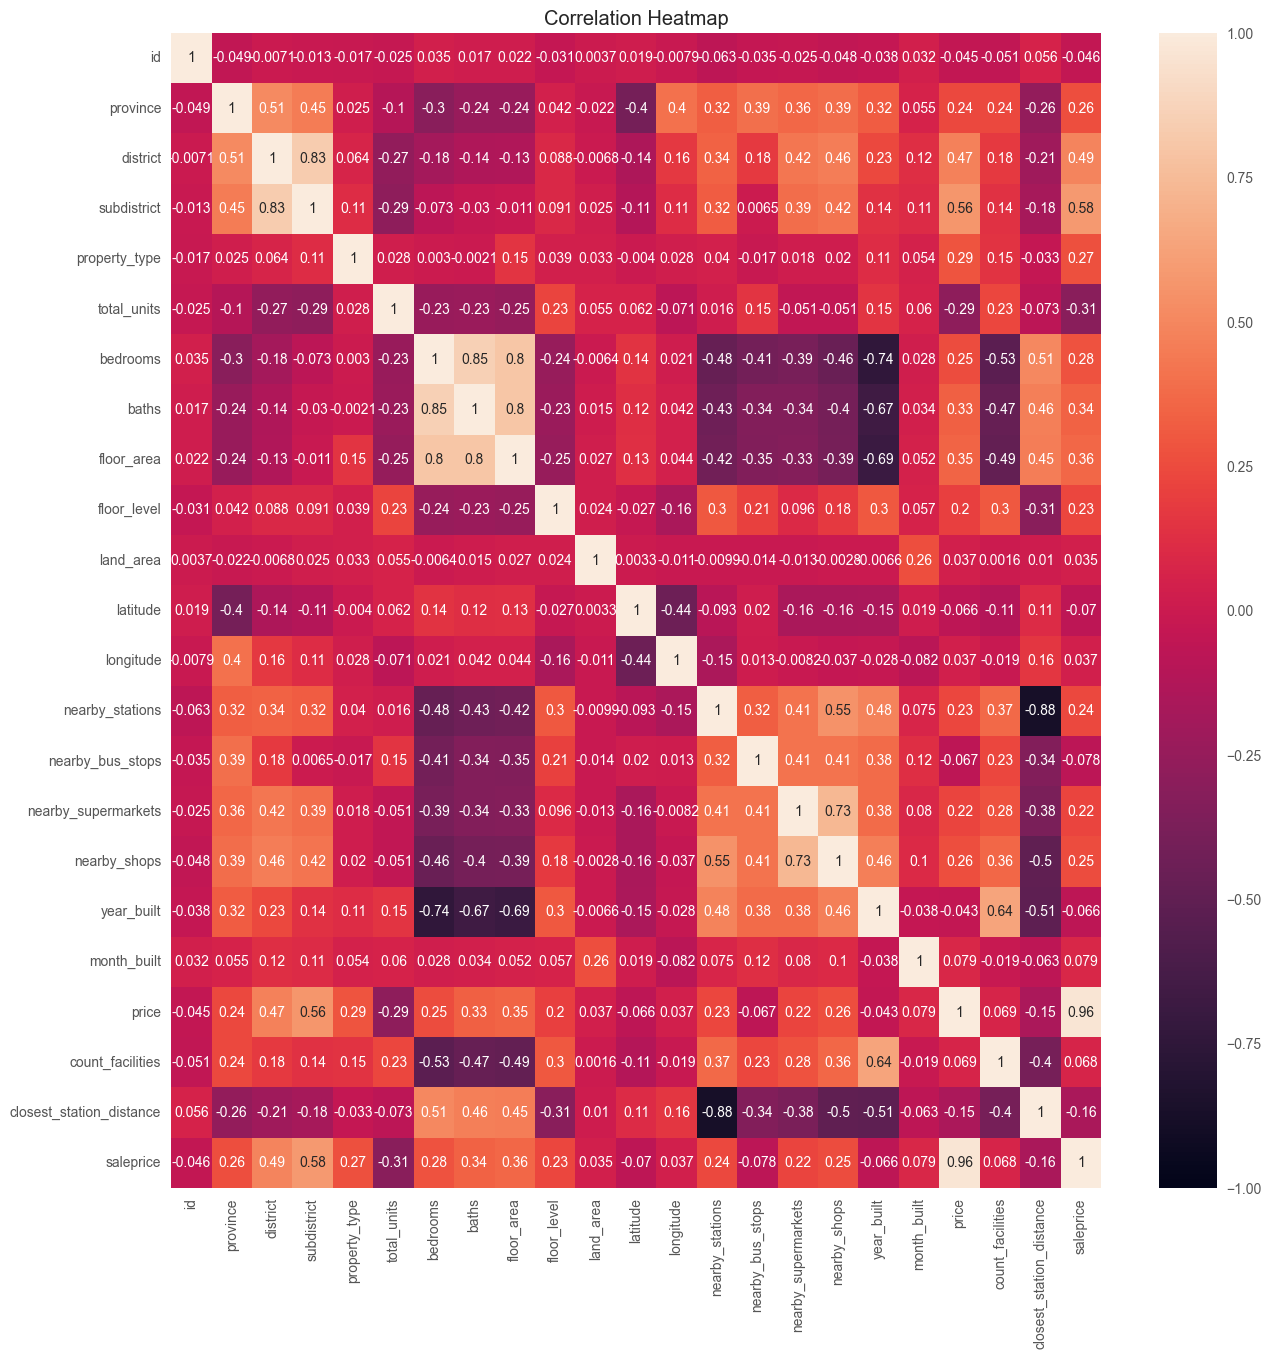

In [33]:
# Correlation heatmap

# Set figure size
plt.figure(figsize=(15, 15))

# Create correlation heatmap
sns.heatmap(train_df2.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

# Set title
plt.title('Correlation Heatmap');

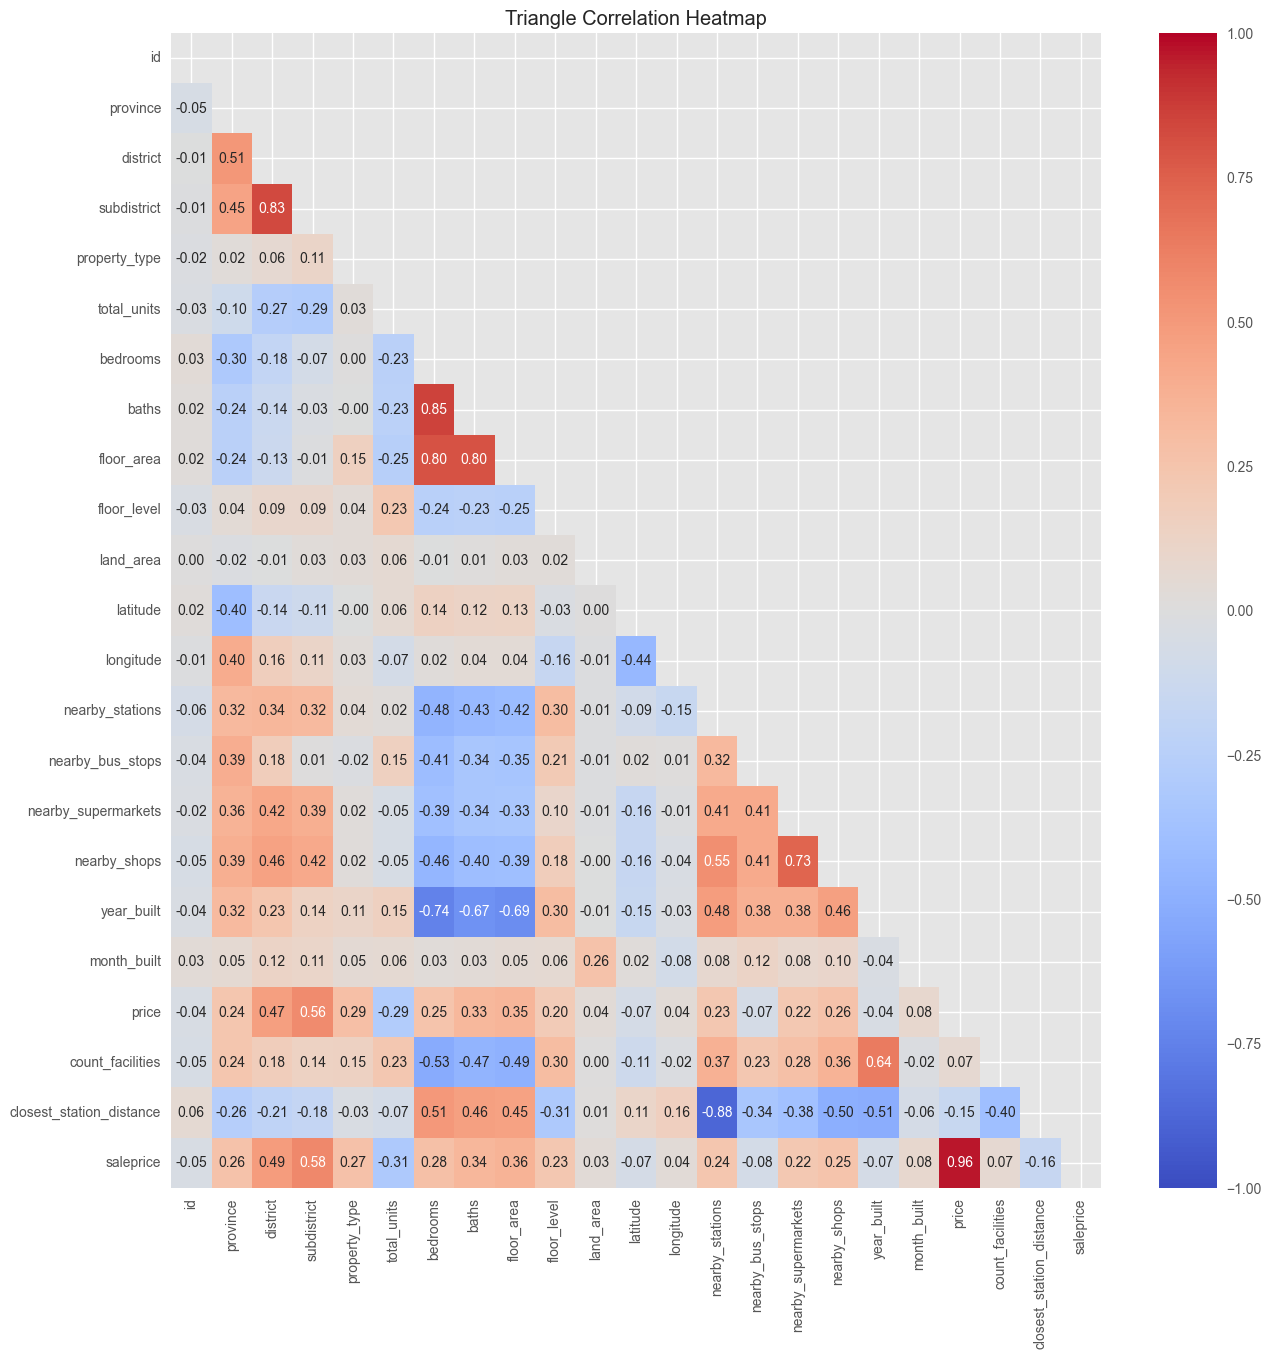

<Figure size 800x550 with 0 Axes>

In [34]:
# Set correlation matrix
corr_matrix = train_df2.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(15, 15))

# Create a correlation heatmap with the mask
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Set the title
plt.title('Triangle Correlation Heatmap')

# Show the plot
plt.show()

# Save figure
plt.savefig('correlation heatmap.jpeg');

In [35]:
# Rank train_df2 correlation score based on price
train_df2.corr(numeric_only=True)['price'].sort_values(ascending=False)

price                       1.000000
saleprice                   0.962380
subdistrict                 0.564869
district                    0.473325
floor_area                  0.351357
baths                       0.334650
property_type               0.285423
nearby_shops                0.257855
bedrooms                    0.254158
province                    0.239900
nearby_stations             0.232143
nearby_supermarkets         0.224702
floor_level                 0.198645
month_built                 0.079473
count_facilities            0.069456
longitude                   0.037417
land_area                   0.036735
year_built                 -0.042557
id                         -0.044732
latitude                   -0.065560
nearby_bus_stops           -0.066557
closest_station_distance   -0.152466
total_units                -0.285896
Name: price, dtype: float64

**Correlation Analysis**

- columns: floor_level, district, subistrict, month_built, count_facilities, longitude, land_area, property_type, year_built, id, latitude, nearby_bus_stops have insignificant correlation

In [36]:
# Create saleprice column by taking log of price
train_df2['saleprice'] = np.log1p(train_df2['price'])

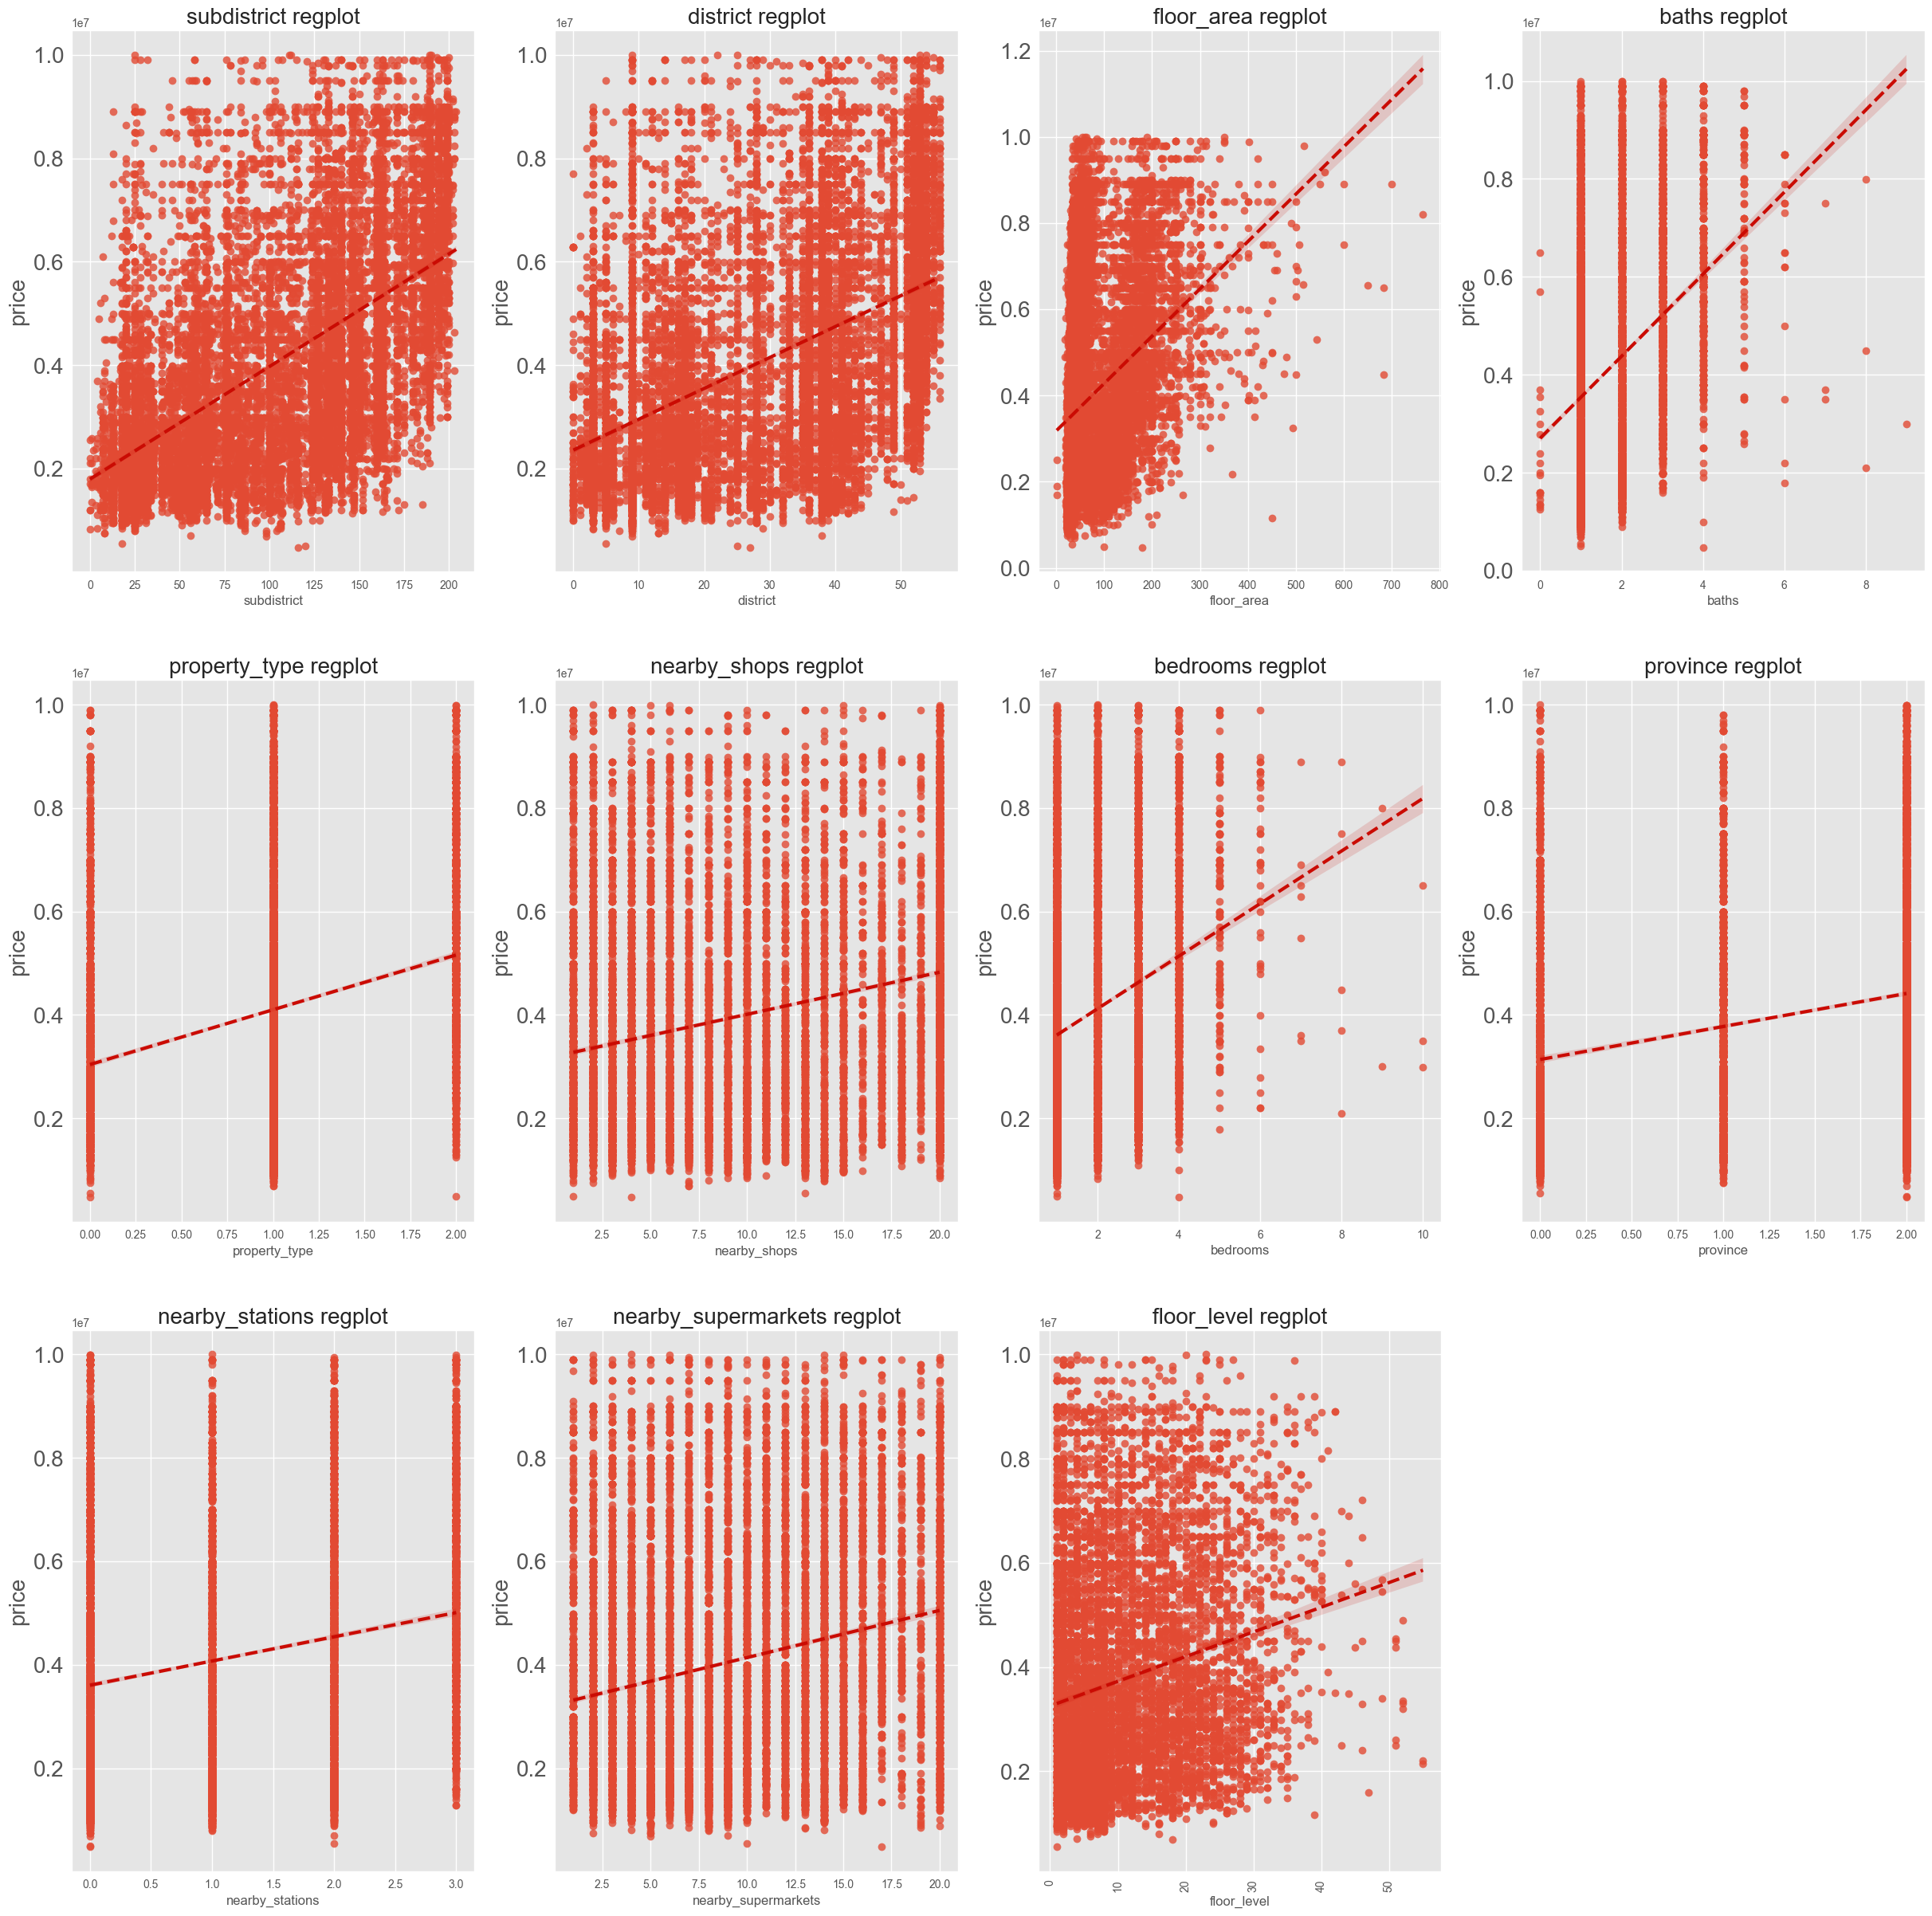

In [37]:
# Regression plots of features with positive correlation with price

# Set figure size
plt.figure(figsize=(30, 30))

# Select columns displayed
columns = ['subdistrict', 'district', 'floor_area', 'baths',
            'property_type', 'nearby_shops', 'bedrooms',
            'province', 'nearby_stations', 'nearby_supermarkets',
            'floor_level', 'total_units', 'closest_station_distance']

# Initiate a for loop that set up a graph of each feature column
for i in range(1, 12):
    col = columns[i - 1]
    plt.subplot(3, 4, i)
    sns.regplot(data=train_df2, x=col, y='price', line_kws={'color': 'r', 'linewidth': 3, 'linestyle': '--'})
    plt.yticks(fontsize=20)
    plt.ylabel('price', fontsize=20)
    plt.title(f'{col} regplot', fontsize=20)

# Set x ticks and deploy the plots
plt.xticks(rotation=90)

# Save figure
plt.savefig('regression plot.png');

**Regression Plot Analysis**
- subdistrict, district, floor_area, baths, nearby_shops, bedrooms, nearby_stations, nearby_supermarkets, and floor_level have clear relationship with price


/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/3975401740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="saleprice", y='district', data=train_df, order=district_order, palette='coolwarm_r')


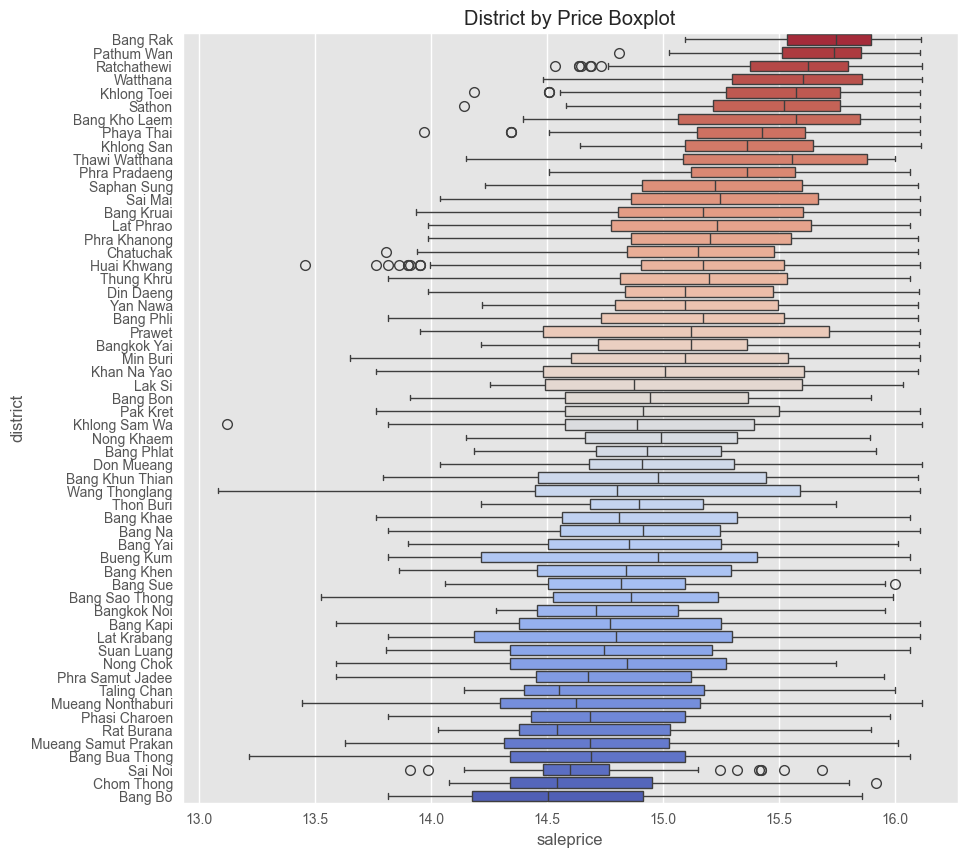

In [38]:
# Box plot of district ranked by price

# Set figure size
plt.figure(figsize=(10,10))

# Group district by saleprice ranked descending
district_order = train_df.groupby('district')['saleprice'].mean().sort_values(ascending=False).index

# Create boxplot of district by saleprice
sns.boxplot(x="saleprice", y='district', data=train_df, order=district_order, palette='coolwarm_r')

# Set title
plt.title('District by Price Boxplot')

# Save figure
plt.savefig('district_price_boxplot.jpg');

**District Boxplot Analysis**
- Bangrak, Pathumwan, Ratchathewi, Wattana, and Klongteoi are the top 5 highest saleprice district
- Mueang Samut Prakan, Bang Bua Thong, Sai Noi, Chom THong, Bang bo are the top 5 lowest saleprice district
- Based on the plot, there exists a clear ranking of district and its price

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/2553986090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="saleprice", y='property_type', data=train_df, order=property_type_order, palette='RdYlGn')


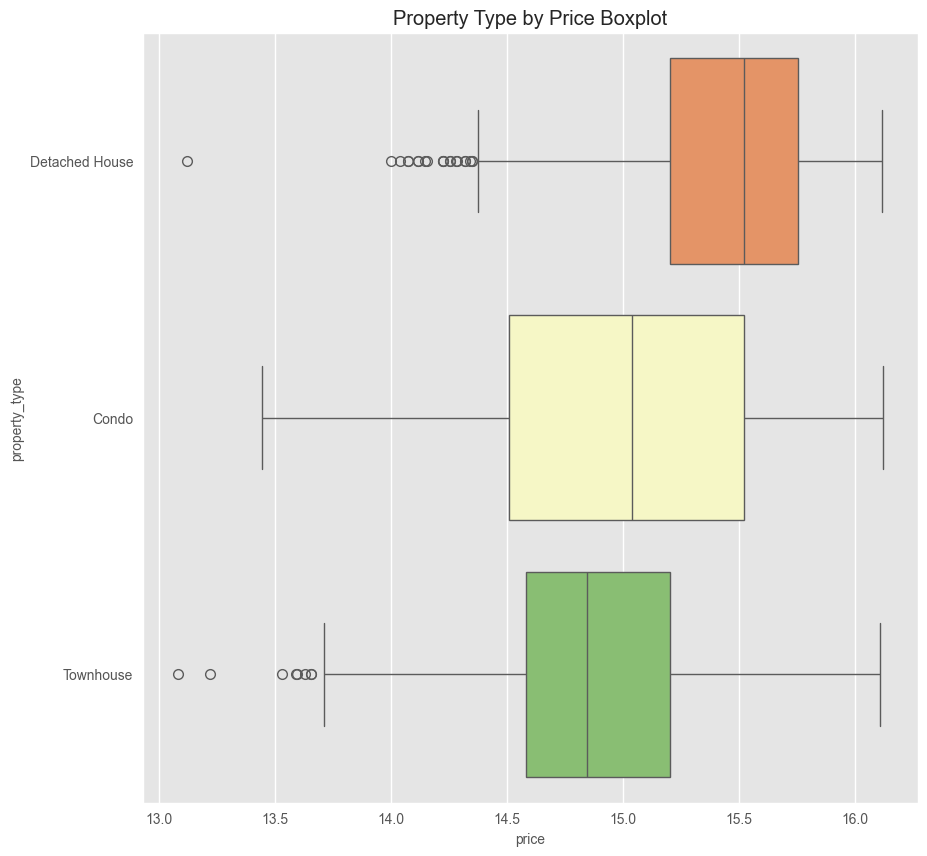

In [161]:
# Box plot of property type ranked by price

# Set figure size
plt.figure(figsize=(10, 10))

# Group property type by saleprice ranked descending order
property_type_order = train_df.groupby('property_type')['saleprice'].mean().sort_values(ascending=False).index

# Create boxplot
sns.boxplot(x="saleprice", y='property_type', data=train_df, order=property_type_order, palette='RdYlGn')

# Set title
plt.title('Property Type by Price Boxplot')

# Set y ticks fontsize
plt.yticks(fontsize=10)

# Set x ticks fontsize
plt.xticks(fontsize=10)

# Set y label and fontsize
plt.ylabel('property_type', fontsize=10)

# Set x label and fontsize
plt.xlabel('price', fontsize=10)

# Save figure
plt.savefig('property_type_price.png');

**Property Type Boxplot Analysis**
- Detached house is the highest priced property, followed by Condo, and Townhouse
- Clear ranking of property type exists

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/2836307565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price", y='province', data=train_df, order=province_order, palette='YlGnBu')


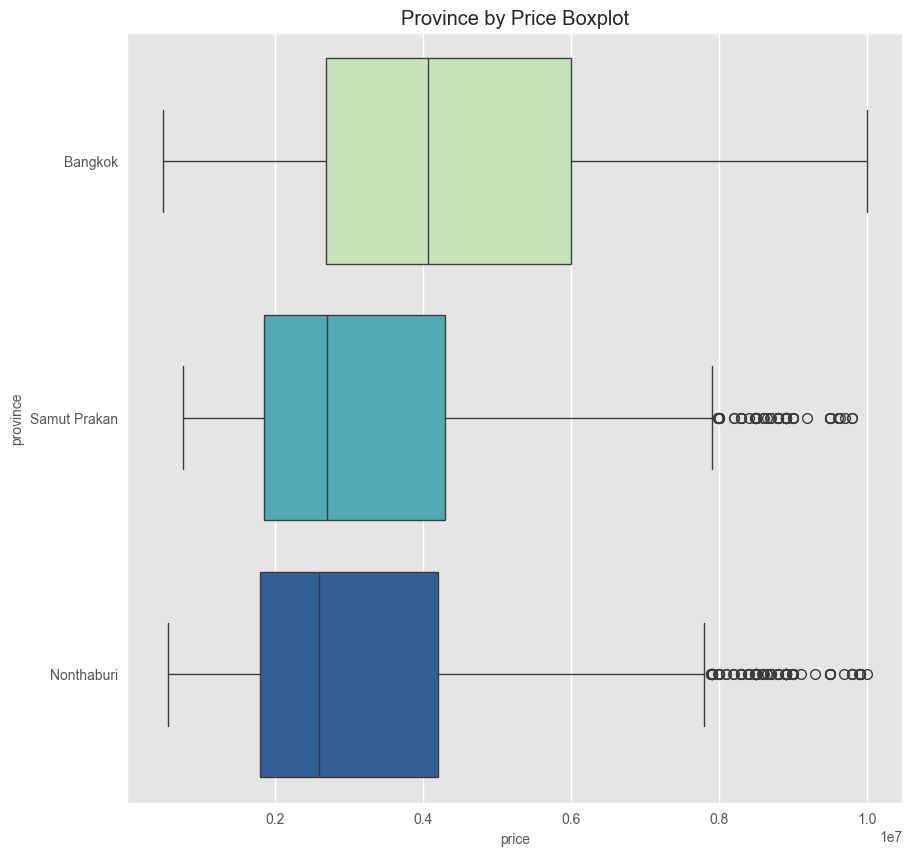

In [40]:
# Box plot of province ranked by price

# Set figure size
plt.figure(figsize=(10,10))

# Grouped province based on saleprice ranked descending
province_order = train_df.groupby('province')['saleprice'].mean().sort_values(ascending=False).index

# Create boxplot
sns.boxplot(x="price", y='province', data=train_df, order=province_order, palette='YlGnBu')

# Set title
plt.title('Province by Price Boxplot')

# Set yticks fontsize
plt.yticks(fontsize=10)

# Set xticks fontsize
plt.xticks(fontsize=10)

# Set y label and its fontsize
plt.ylabel('province', fontsize=10)

# Set x label and its fontsize
plt.xlabel('price', fontsize=10)

# Save figure
plt.savefig('province_price.png');

**Province Boxplot Analysis**
- Bangkok is the highest priced province followed by Samut Prakan, then Nonthaburi
- Clear ranking of province exists

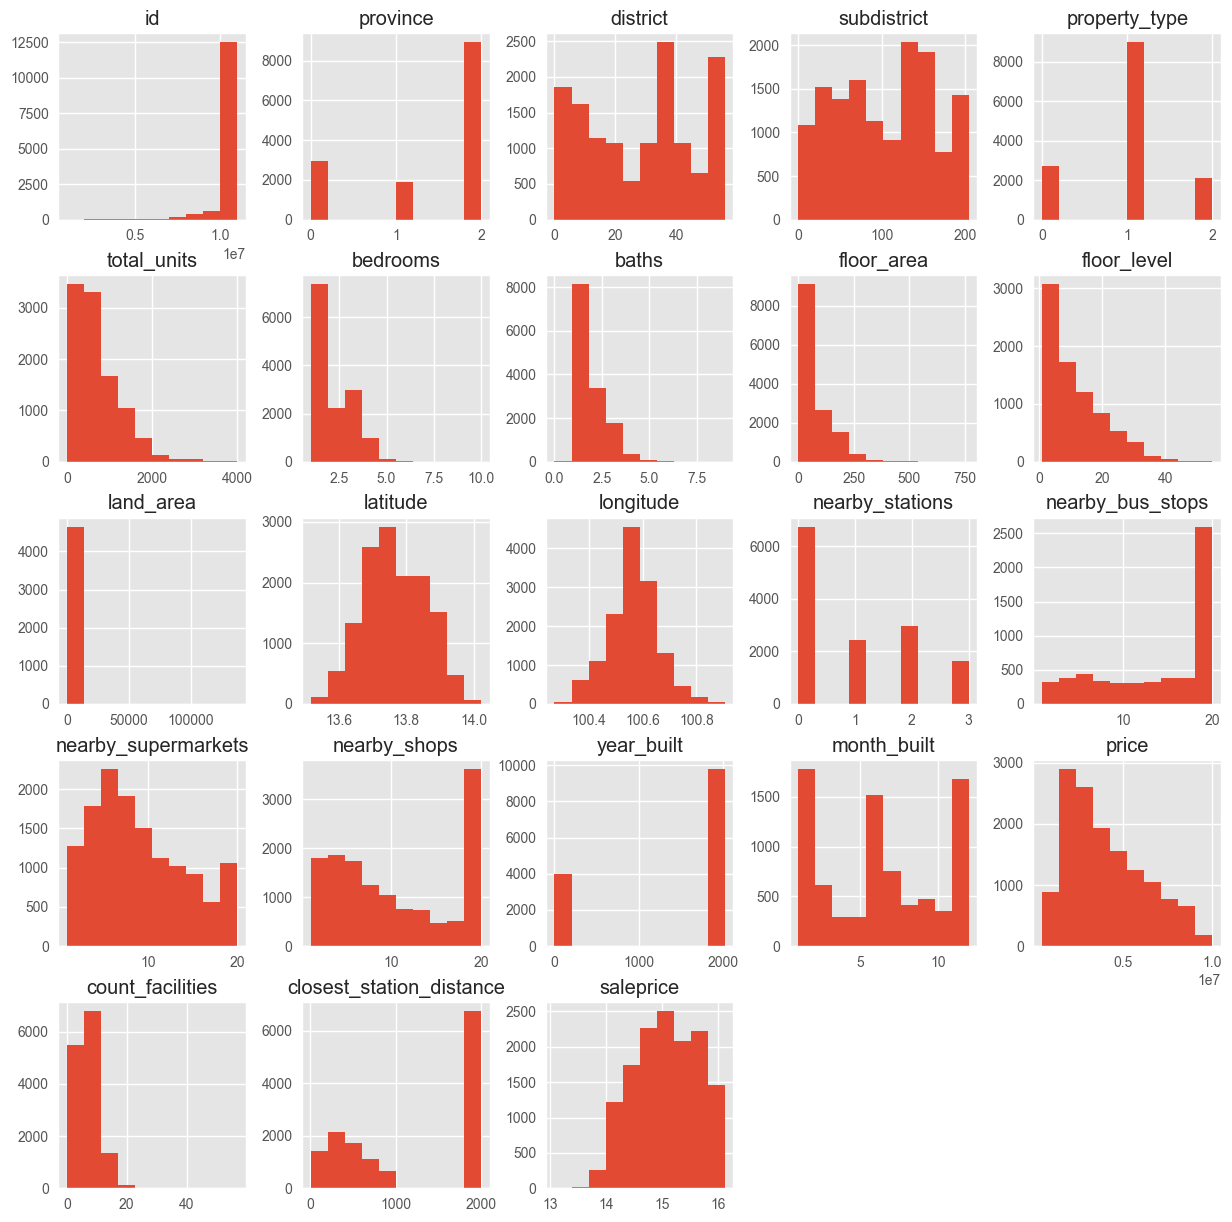

In [41]:
# Histogram of numeric columns

train_df2.hist(figsize=(15, 15));

**Histogram Analysis**
- Latitude and Longitude are the only predictors that follow normal distribution
- total_units, bedrooms, baths, floor_area, floor_level, nearby_supermarkets, and price are presented with right-skewed where data aggregated more at the lower end of the data range

## Train-Test-Split

In [43]:
# Features selection for predictors with price-correlated score above absolute 0.1
features = ['subdistrict', 'district', 'floor_area', 'baths',
            'property_type', 'nearby_shops', 'bedrooms',
            'province', 'nearby_stations', 'nearby_supermarkets',
            'floor_level', 'total_units', 'closest_station_distance']
           

In [44]:
# Set up X and y

X = train_df2[features]
y = train_df2['price']


In [45]:
# See X shape
X.shape

(13787, 13)

In [46]:
# Set up train-test-split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

# Print X_train, y_train, X_valid, and y_valid shapes
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(11029, 13)
(11029,)
(2758, 13)
(2758,)


## Pre-processing: KNN Imputer

In [47]:
# Set up RMSE calculation function
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [49]:
# Set up optimize_k function to show each neighbor

# Define optimize_k function that needs 2 inputs data and target
def optimize_k(data, target):
    errors = []

    # Initiate for loop of the range of k that fit X data
    for k in range(1, 20, 1):
        knn = KNNImputer(n_neighbors=k)
        X_train_knn = knn.fit_transform(X_train)
        X_valid_knn = knn.transform(X_valid)

        # Create dataframe of X_train_knn containing all columns
        X_train_knn = pd.DataFrame(X_train_knn, columns=X_train.columns)

    
        # Set up knn_model and evaluate each k
        knn_model = LinearRegression()
        knn_model.fit(X_train_knn, y_train)
        preds = knn_model.predict(X_valid_knn)
        error = rmse(y_valid, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [50]:
# Run the function with train_df2 as data and price as target
k_errors = optimize_k(data=train_df2, target='price')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have vali

In [51]:
# Print out k_errors
k_errors

[{'K': 1, 'RMSE': 1377283.3377121552},
 {'K': 2, 'RMSE': 1373359.9953259628},
 {'K': 3, 'RMSE': 1373497.8253319028},
 {'K': 4, 'RMSE': 1371375.2827217935},
 {'K': 5, 'RMSE': 1372416.397510357},
 {'K': 6, 'RMSE': 1373266.8728558398},
 {'K': 7, 'RMSE': 1372352.5412769017},
 {'K': 8, 'RMSE': 1372658.577194074},
 {'K': 9, 'RMSE': 1372868.397009458},
 {'K': 10, 'RMSE': 1372597.0730115585},
 {'K': 11, 'RMSE': 1372455.7726511175},
 {'K': 12, 'RMSE': 1372345.5270683996},
 {'K': 13, 'RMSE': 1372567.3684354573},
 {'K': 14, 'RMSE': 1372808.0569123065},
 {'K': 15, 'RMSE': 1372833.6433913363},
 {'K': 16, 'RMSE': 1372629.328407314},
 {'K': 17, 'RMSE': 1373212.4456665257},
 {'K': 18, 'RMSE': 1373402.4419220332},
 {'K': 19, 'RMSE': 1373374.8489120326}]

** K neighbors evaluation**
- K=4 has the lowest RMSE

In [52]:
# Set KNNImputer with neighbors=4 
knn = KNNImputer(n_neighbors=4)

# Transform X_train and X_valid
X_train_knn = knn.fit_transform(X_train)
X_valid_knn = knn.transform(X_valid)

In [53]:
# Create a dataframe of X_train_knn
X_train_knn = pd.DataFrame(X_train_knn, columns=X_train.columns)

In [54]:
# Create a dataframe of X_valid_knn 
X_valid_knn = pd.DataFrame(X_valid_knn, columns=X_valid.columns)

In [55]:
# Check X_train_knn null values
X_train_knn.isnull().sum()

subdistrict                 0
district                    0
floor_area                  0
baths                       0
property_type               0
nearby_shops                0
bedrooms                    0
province                    0
nearby_stations             0
nearby_supermarkets         0
floor_level                 0
total_units                 0
closest_station_distance    0
dtype: int64

In [56]:
# Check X_valid_knn null values
X_valid_knn.isnull().sum()

subdistrict                 0
district                    0
floor_area                  0
baths                       0
property_type               0
nearby_shops                0
bedrooms                    0
province                    0
nearby_stations             0
nearby_supermarkets         0
floor_level                 0
total_units                 0
closest_station_distance    0
dtype: int64

**Pre-processing: KNN Imputation Analysis**
- KNN Imputation method is utilized because of its accuracy than imputing by mean/median/mode because it captures the similarities of the features close to the data point


## Pre-processing: Standardization

In [57]:
# Initiate StandardScaler
sc = StandardScaler()

In [58]:
# Transform X_train_knn and X_valid_knn using StandardScaler
X_train_std = sc.fit_transform(X_train_knn)
X_valid_std = sc.transform(X_valid_knn)

## Model 1: Linear Regression

In [59]:
# Initiate Linear Regression model
lr = LinearRegression()

# Fit X_train_std and y_train to Linear Regression model
lr.fit(X_train_std, y_train)

LinearRegression()

In [60]:
y_train_pred =lr.predict(X_train_std)
y_valid_pred = lr.predict(X_valid_std)

In [61]:
# Print Linear Regression score of training data
print(lr.score(X_train_std, y_train))

0.6193559381542455


In [62]:
# Print Linear Regression score of validating data
print(lr.score(X_valid_std, y_valid))

0.6092927658135293


In [63]:
# Print out R squared score and RMSE score of y_train and y_train_optimal_ridge prediction
print("R-Square Train: ", r2_score(y_train, y_train_pred))
print("R-Square Validation: ",r2_score(y_valid, y_valid_pred))
print("="*50)
print("RMSE of Train :", mean_squared_error(y_train, y_train_pred, squared=False))
print("RMSE of Validation  :", mean_squared_error(y_valid, y_valid_pred, squared=False))

R-Square Train:  0.6193559381542455
R-Square Validation:  0.6092927658135293
RMSE of train : 1346780.1298077581
RMSE of Validation  : 1371375.2827217935


In [64]:
# List of all columns in X_train data with Linear Regression coefficients
list(zip(X_train.columns, lr.coef_))

[('subdistrict', 647370.4826723365),
 ('district', 219827.89799907722),
 ('floor_area', 518977.9892251212),
 ('baths', 705019.4390597268),
 ('property_type', 432222.17449726985),
 ('nearby_shops', 250223.89863954834),
 ('bedrooms', 185030.5857034293),
 ('province', 101512.37213179258),
 ('nearby_stations', 142288.72878010024),
 ('nearby_supermarkets', 115059.40419650442),
 ('floor_level', 402198.19756127347),
 ('total_units', -197619.1781045961),
 ('closest_station_distance', -334691.48843414296)]

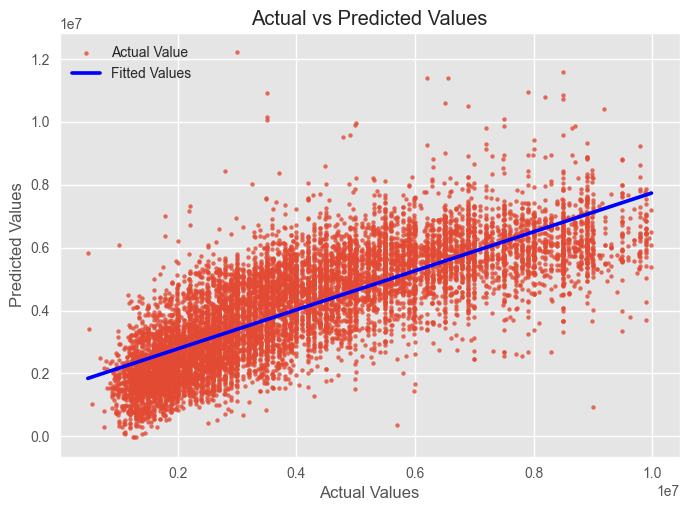

In [67]:
# Model evaluation: Predicted values vs. Actual values

# Create regression plot 
sns.regplot(x=y_train, y=y_train_pred, scatter_kws={'s': 10}, line_kws={'color': 'blue'})

# Set x label
plt.xlabel('Actual Values')

# Set y label
plt.ylabel('Predicted Values')

# Set title
plt.title('Actual vs Predicted Values')

# Create labels
labels = ["Actual Value", "Fitted Values"]

# Set legend
plt.legend(labels=labels)

# Save figure
plt.savefig('Model1_regplot.png');

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/1557892928.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_valid, hist=False, color="r", label="Actual Value")
/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/1557892928.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

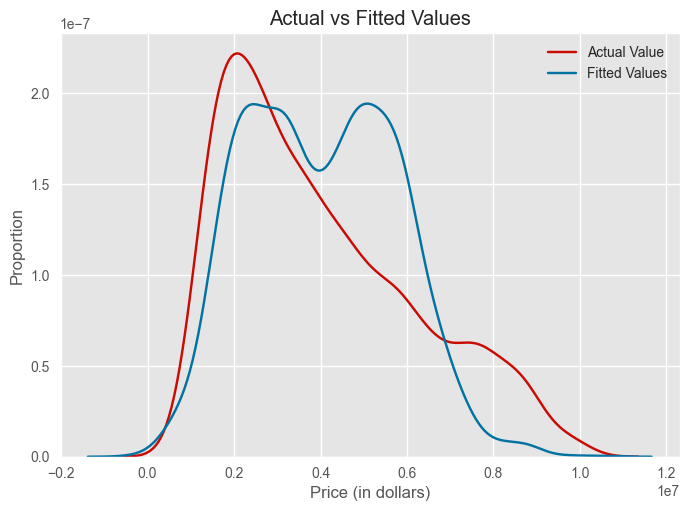

In [162]:
# Create distribution plot of actual values
ax1 = sns.distplot(y_valid, hist=False, color="r", label="Actual Value")

# Create distribution plot of fitted values
sns.distplot(y_valid_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Set title
plt.title('Actual vs Fitted Values')

# Set x label
plt.xlabel('Price (in dollars)')

# Set y label
plt.ylabel('Proportion')

# Create labels
labels = ["Actual Value", "Fitted Values"]

# Set legend
plt.legend(labels=labels);


**Linear Regression Model Analysis**
- The model is underfit
- The train and validated scores are quite close which means that the model performance on training data and validated data yield proportionate results

## Linear Regression: Cross Validation

In [92]:
# Check Cross Validation score with cv=5

# inititate cross val score funtion
lr_scores = cross_val_score(lr, X_train_std, y_train, cv=5)

# Calculate mean
lr_scores.mean() # Cross val R2, ie, estimate on r2 on unseen data

0.6179554594742627

In [93]:
# Check Cross Validation score with cv=6

# inititate cross val score funtion
lr_scores = cross_val_score(lr, X_train_std, y_train, cv=6)

# Calculate mean
lr_scores.mean() # Cross val R2, ie, estimate on r2 on unseen data

0.6177122870276209

In [94]:
# Check Cross Validation score with cv=7

# inititate cross val score funtion
lr_scores = cross_val_score(lr, X_train_std, y_train, cv=7)

# Calculate mean
lr_scores.mean() # Cross val R2, ie, estimate on r2 on unseen data

0.6176986640864628

In [95]:
# Check Cross Validation score with cv=8

# inititate cross val score funtion
lr_scores = cross_val_score(lr, X_train_std, y_train, cv=8)

# Calculate mean
lr_scores.mean() # Cross val R2, ie, estimate on r2 on unseen data

0.6174414889942541

In [96]:
# Check Cross Validation score with cv=9

# inititate cross val score funtion
lr_scores = cross_val_score(lr, X_train_std, y_train, cv=9

# Calculate mean                           
lr_scores.mean() # Cross val R2, ie, estimate on r2 on unseen data

0.6177098331225942

In [97]:
# Check Cross Validation score with cv=10

# inititate cross val score funtion
lr_scores = cross_val_score(lr, X_train_std, y_train, cv=10)

# Calculate mean                           
lr_scores.mean() # Cross val R2, ie, estimate on r2 on unseen data

0.6179317002891686

**Cross Validation Score Analysis**
- cv = 6 generated the best score, so 6 is the chosen number
  

In [70]:
# predict with most optimal cv = 6

# Initiate cross val predict function with cv=6 on training data
y_pred_train_cv = cross_val_predict(lr, X_train_std, y_train, cv=6)

# Initiate cross val predict function with cv=6 on validating data
y_pred_valid_cv = cross_val_predict(lr, X_valid_std, y_valid, cv=6)

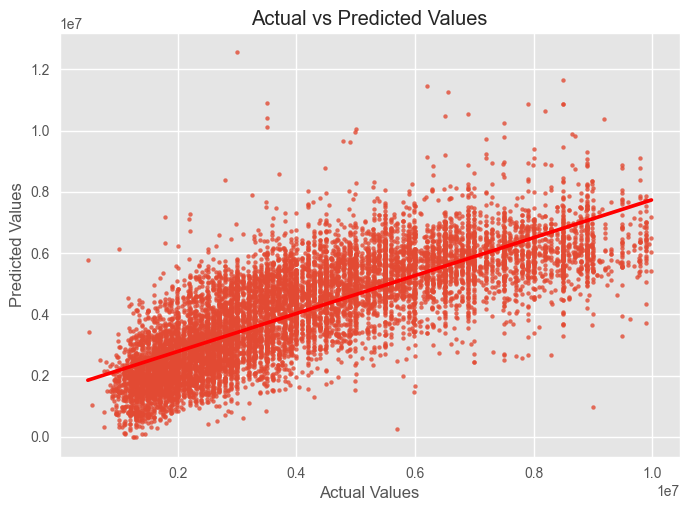

In [71]:
# Model evaluation graph: Predicted values vs. Actual values

# Create regression plot of y_train against y_pred_train_cv
sns.regplot(x=y_train, y=y_pred_train_cv, scatter_kws={'s': 10}, line_kws={'color': 'blue'})

# Set x label
plt.xlabel('Actual Values')

# Set y label
plt.ylabel('Predicted Values')

# Set title
plt.title('Actual vs Predicted Values')
plt.show()

**Linear Regression: Cross Validation Analysis**
- Integrating cross validation technique into the model to search for the best score is not an efficient technique because the score generated was not improved

## Model 2: Polymonial Feature Linear Regression

In [73]:
# Set up Polynomial Features transformation with degree=2
poly_reg = PolynomialFeatures(degree=2)

In [74]:
# Scaled X scaled train and valid data to Polynomial Features transformer
X_train_poly = poly_reg.fit_transform(X_train_std)
X_valid_poly = poly_reg.transform(X_valid_std)

In [75]:
# Check X_train_poly shape
X_train_poly.shape

(11029, 105)

In [76]:
# Initiate Linear Regression Model 2
lin_reg2 = LinearRegression()

In [77]:
# Fit polynomial features X_train_poly with y_train
lin_reg2.fit(X_train_poly, y_train)

LinearRegression()

In [78]:
# Predict X_train_poly and X_valid_poly
y_train_poly_pred = lin_reg2.predict(X_train_poly)
y_valid_poly_pred = lin_reg2.predict(X_valid_poly)

In [79]:
# Print R squared score of y_train and y_train_poly prediction
print("R-Square Train: ", r2_score(y_train, y_train_poly_pred))
print("R-Square Validation: ",r2_score(y_valid, y_valid_poly_pred))

R-Square Train:  0.7155729816477747
R-Square Validation:  0.7002739334580338


In [80]:
# Print RMSE score of y_train and y_train_poly prediction
print("RMSE of train :", mean_squared_error(y_train, y_train_poly_pred, squared=False))
print("RMSE of test  :", mean_squared_error(y_valid, y_valid_poly_pred, squared=False))

RMSE of train : 1164186.5969208174
RMSE of test  : 1201137.8386152948


In [84]:
# Print out R squared score and RMSE score of y_train and y_train_optimal_ridge prediction
print("R-Square Train: ", r2_score(y_train, y_train_poly_pred))
print("R-Square Validation: ",r2_score(y_valid, y_valid_poly_pred))
print("="*50)
print("RMSE of Train :", mean_squared_error(y_train, y_train_poly_pred, squared=False))
print("RMSE of Validation  :", mean_squared_error(y_valid, y_valid_poly_pred, squared=False))

R-Square Train:  0.7155729816477747
R-Square Validation:  0.7002739334580338
RMSE of Train : 1164186.5969208174
RMSE of Validation  : 1201137.8386152948


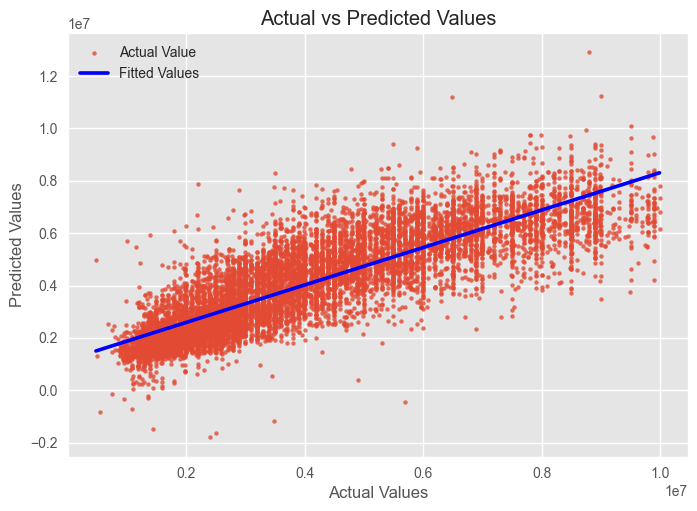

In [85]:
# Model evaluation: Predicted values vs. Actual values

# Create regresion plot of actual values and predicted values
sns.regplot(x=y_train, y=y_train_poly_pred, scatter_kws={'s': 10}, line_kws={'color': 'blue'})

# Set x label
plt.xlabel('Actual Values')

# Set y label
plt.ylabel('Predicted Values')

# Set title
plt.title('Actual vs Predicted Values')

# Create labels
labels = ["Actual Value", "Fitted Values"]

# set legend
plt.legend(labels=labels)
plt.show()

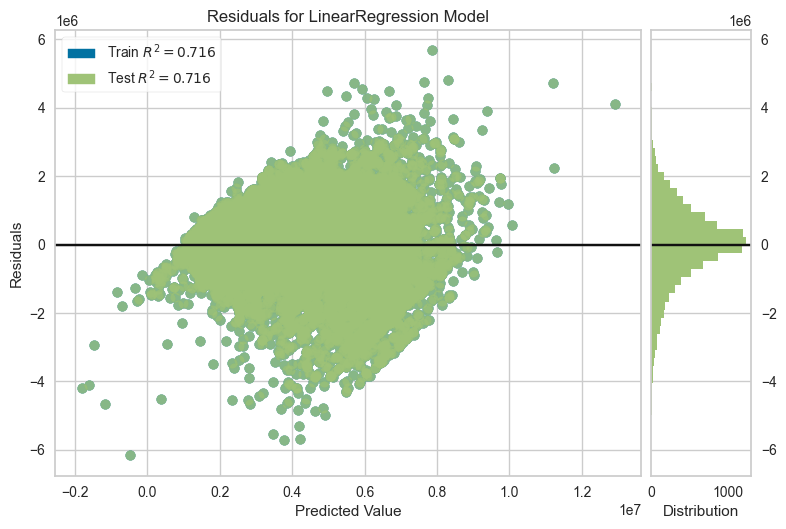

In [135]:
# Initiate residual plot of train and test model

# Initiate residual plot
visualizer = ResidualsPlot(lin_reg2)

# Fit X_train_poly and y_train
visualizer.fit(X_train_poly, y_train)

# Generate the score
visualizer.score(X_train_poly, y_train)
visualizer.show();

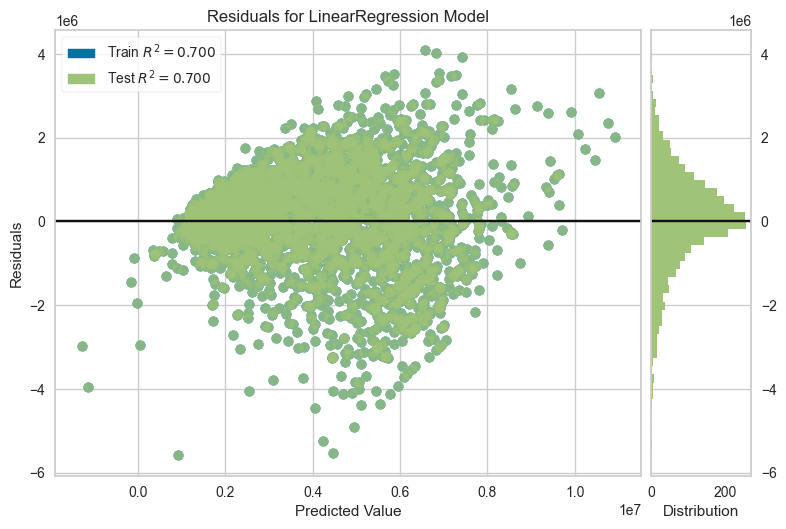

In [136]:
# Initiate residual plot of train and test model

# Initiate residual plot
visualizer = ResidualsPlot(lin_reg2)

# Fit X_train_poly and y_train
visualizer.fit(X_valid_poly, y_valid)

# Generate the score
visualizer.score(X_valid_poly, y_valid)
visualizer.show();

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/2403502814.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_valid, hist=False, color="r", label='Actual Values')
/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/2403502814.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

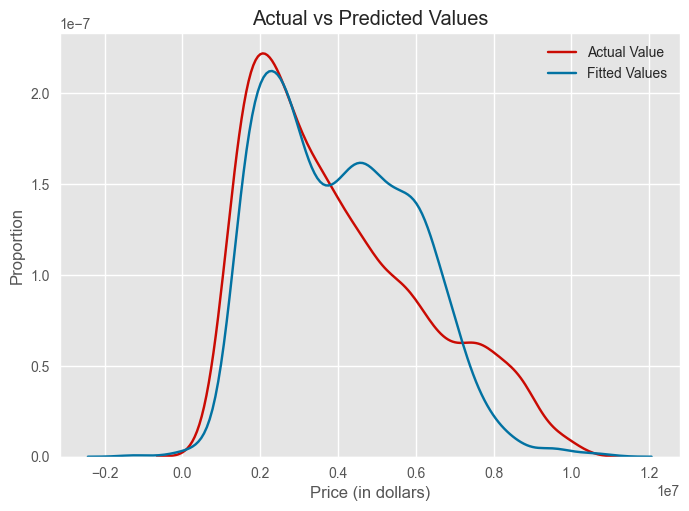

In [82]:
# Model evaluation plot of actual values vs predicted values

# Create distribution plot of actual values
ax1 = sns.distplot(y_valid, hist=False, color="r", label='Actual Values')

# Create distribution plot of predicted values
sns.distplot(y_valid_poly_pred, hist=False, color="b", label='Predicted Values' , ax=ax1)

# Set title
plt.title('Actual vs Predicted Values')

# Set x label
plt.xlabel('Price (in dollars)')

# Set y label
plt.ylabel('Proportion')

# Create labels
labels = ["Actual Value", "Fitted Values"]

# Set legend
plt.legend(labels=labels)
plt.show()
plt.close();

**Polynomial Featured Linear Regression Model**
- Model is improved in performance because of the improved score
- The model is less underfit

## Regularization: Ridge

In [90]:
# Initiate Ridge regularizer
gs_ridge_reg = Ridge()

In [91]:
# Set up grid parameter with the range of alphas from 0.1 to 10
param_grid = [{'alpha': [alpha]} for alpha in np.linspace(0.1, 10.0, 100)]


In [92]:
# Set up GridSearchCV with ridge as estimator, param_grid as the range of alphas, and scoring is set as negative mean squared error

# Initiate GridSearchCV
grid = GridSearchCV(estimator=gs_ridge_reg, param_grid=param_grid, scoring="neg_mean_squared_error", n_jobs=-1)

# Fit X_train_poly and y_train
grid.fit(X_train_poly, y_train)
print(grid)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [0.1]}, {'alpha': [0.2]},
                         {'alpha': [0.30000000000000004]}, {'alpha': [0.4]},
                         {'alpha': [0.5]}, {'alpha': [0.6]},
                         {'alpha': [0.7000000000000001]}, {'alpha': [0.8]},
                         {'alpha': [0.9]}, {'alpha': [1.0]}, {'alpha': [1.1]},
                         {'alpha': [1.2000000000000002]},
                         {'alpha': [1.3000000000000003]},
                         {'alpha': [1.4000000000000001...
                         {'alpha': [1.8000000000000003]},
                         {'alpha': [1.9000000000000001]}, {'alpha': [2.0]},
                         {'alpha': [2.1]}, {'alpha': [2.2]},
                         {'alpha': [2.3000000000000003]},
                         {'alpha': [2.4000000000000004]},
                         {'alpha': [2.5000000000000004]}, {'alpha': [2.6]},
                         {'alpha': [2.7]},

In [93]:
# Print grid with the best score and its alpha

print(grid.best_score_)
print(grid.best_estimator_.alpha)

-1402726447542.8267
10.0


In [94]:
# Set ridge regularizer with alpha=10
opt_ridge_reg = Ridge(alpha=10)

In [95]:
# Fit X_train_poly and y_train to the ridge regularizer with alpha=10
opt_ridge_reg.fit(X_train_poly, y_train)

Ridge(alpha=10)

In [96]:
# Predict X_train_poly and X_valid_poly using the ridge with alpha 10
y_train_poly_opt_ridge_pred = opt_ridge_reg.predict(X_train_poly)
y_valid_poly_opt_ridge_pred = opt_ridge_reg.predict(X_valid_poly)

In [97]:
# Print out R squared score and RMSE score of y_train and y_train_optimal_ridge prediction
print("R-Square Train: ", r2_score(y_train, y_train_poly_opt_ridge_pred))
print("R-Square Validation: ",r2_score(y_valid, y_valid_poly_opt_ridge_pred))
print("="*50)
print("RMSE of Train :", mean_squared_error(y_train, y_train_poly_opt_ridge_pred, squared=False))
print("RMSE of Validation  :", mean_squared_error(y_valid, y_valid_poly_opt_ridge_pred, squared=False))

R-Square Train:  0.7155349372270392
R-Square Validation:  0.7005436883743024
RMSE of Train : 1164264.4540175162
RMSE of Validation  : 1200597.201998452


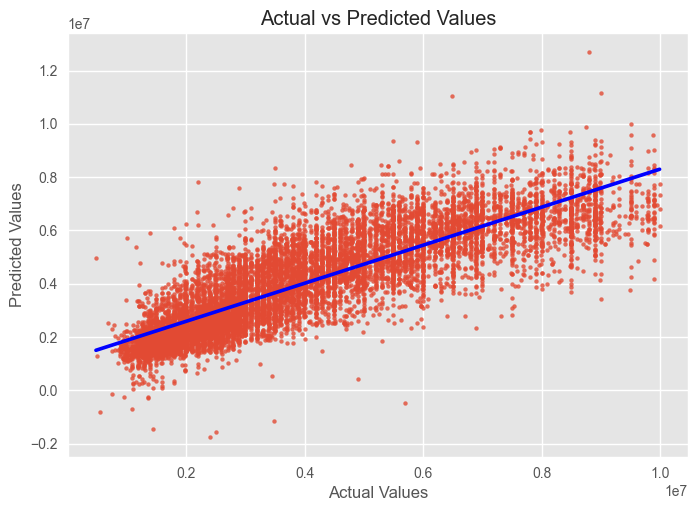

In [99]:
# Model evaluation: Predicted values vs. Actual values

# Create regression plot of actual and predicted values
sns.regplot(x=y_train, y=y_train_poly_opt_ridge_pred, scatter_kws={'s': 10}, line_kws={'color': 'blue'})

# Set x label
plt.xlabel('Actual Values')

# Set y label
plt.ylabel('Predicted Values')

# Set title
plt.title('Actual vs Predicted Values')
plt.show()

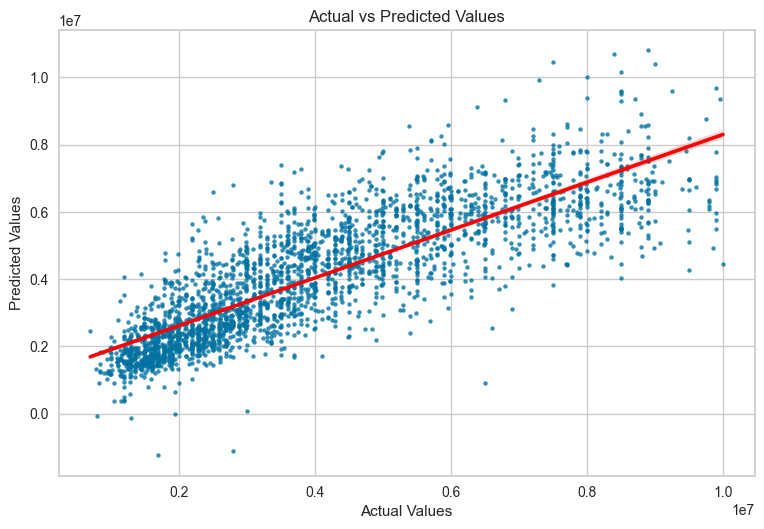

In [157]:
# Model evaluation: Predicted values vs. Actual values

# Create regression plot of actual vs. predicted values
sns.regplot(x=y_valid, y=y_valid_poly_opt_ridge_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Set x label
plt.xlabel('Actual Values')

# Set y label
plt.ylabel('Predicted Values')

# Set title
plt.title('Actual vs Predicted Values')
plt.show()

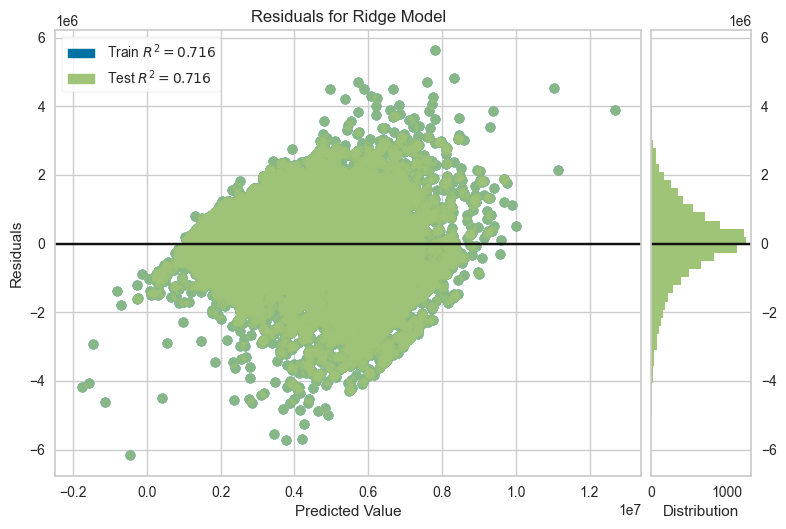

In [158]:
# Initiate residual plot
visualizer = ResidualsPlot(opt_ridge_reg)

# Fit data to the plot model
visualizer.fit(X_train_poly, y_train)

# Generate the score
visualizer.score(X_train_poly, y_train)
visualizer.show();

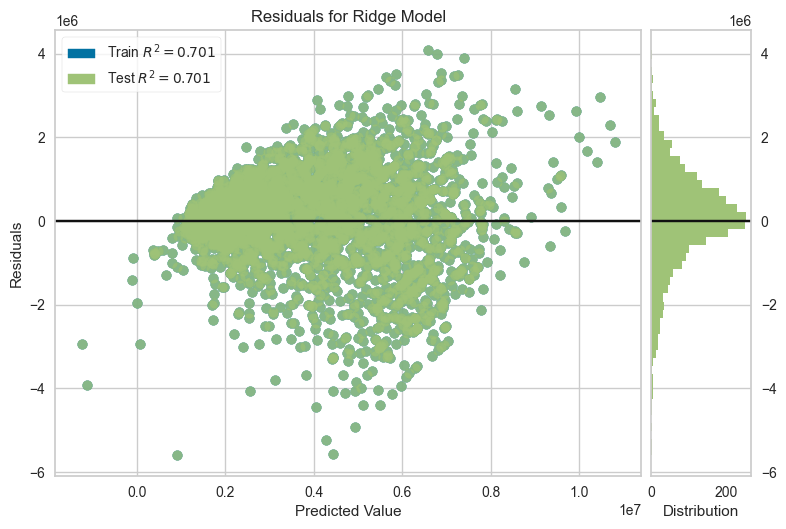

In [160]:
# Initiate residual plot
visualizer = ResidualsPlot(opt_ridge_reg)

# Fit data to the plot model
visualizer.fit(X_valid_poly, y_valid)

# Generate the score
visualizer.score(X_valid_poly, y_valid)
visualizer.show();

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/3974499922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_valid, hist=False, color="r", label='Actual Values')
/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/3974499922.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

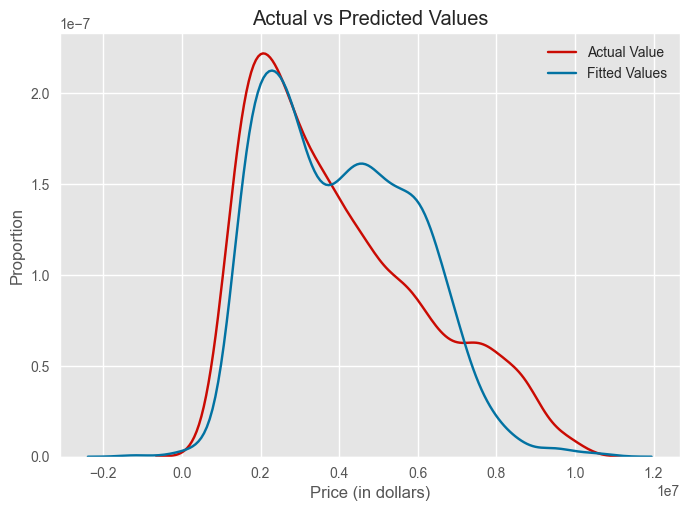

In [100]:
# Model evaluation plot of actual values vs predicted values

# Create distribution plot of actual values
ax1 = sns.distplot(y_valid, hist=False, color="r", label='Actual Values')

# Create distribution plot of predicted values
sns.distplot(y_valid_poly_opt_ridge_pred, hist=False, color="b", label='Predicted Values' , ax=ax1)

# Set title
plt.title('Actual vs Predicted Values')

# Set x label
plt.xlabel('Price (in dollars)')

# Set y label
plt.ylabel('Proportion')

# Create labels
labels = ["Actual Value", "Fitted Values"]

# Set legend
plt.legend(labels=labels)
plt.show()
plt.close();

**Ridge Regularization Analysis**
- The score does not improved and the performance is the same

## Regularization: Lasso

In [103]:
# Initiate Lasso regularizer
gs_lasso_reg = Lasso()

In [104]:
# Set up grid parameter with the listed alphas
param_grid = {'alpha':[0.0005, 0.0006, 0.06, 0.5, 0.0001, 0.01, 2, 3, 4, 5, 10]}


In [105]:
# Set up GridSearchCV with lasso as estimator, param_grid as the range of alphas, and scoring is set as negative mean squared error
grid = GridSearchCV(estimator=gs_lasso_reg, param_grid=param_grid, scoring="neg_mean_squared_error", n_jobs=-1)
grid.fit(X_train_poly, y_train)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.812e+15, tolerance: 4.192e+12
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.874e+15, tolerance: 4.200e+12
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0005, 0.0006, 0.06, 0.5, 0.0001, 0.01, 2,
                                   3, 4, 5, 10]},
             scoring='neg_mean_squared_error')

In [106]:
# Print grid with the best score and its alpha
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-1403958838485.11
10


In [107]:
# Set lasso regularizer with alpha=10
opt_lasso_reg = Lasso(alpha=10)

In [108]:
# Fit X_train_poly and y_train to the lasso regularizer with alpha=10
opt_lasso_reg.fit(X_train_poly, y_train)

Lasso(alpha=10)

In [109]:
# Predict X_train_poly and X_valid_poly with opt_lasso_reg
y_train_poly_opt_lasso_pred = opt_lasso_reg.predict(X_train_poly)
y_valid_poly_opt_lasso_pred = opt_lasso_reg.predict(X_valid_poly)

In [112]:
# Print out R squared score and RMSE score of y_train and y_train_poly_opt_lasso_pred prediction
print("R-Square Train: ", r2_score(y_train, y_train_poly_opt_lasso_pred))
print("R-Square Validation: ",r2_score(y_valid, y_valid_poly_opt_lasso_pred))
print("="*50)
print("RMSE of Train :", mean_squared_error(y_train, y_train_poly_opt_lasso_pred, squared=False))
print("RMSE of Validation  :", mean_squared_error(y_valid, y_valid_poly_opt_lasso_pred, squared=False))

R-Square Train:  0.7155729299162299
R-Square Validation:  0.7002846888592379
RMSE of Train : 1164186.702791857
RMSE of Validation  : 1201116.2875446773


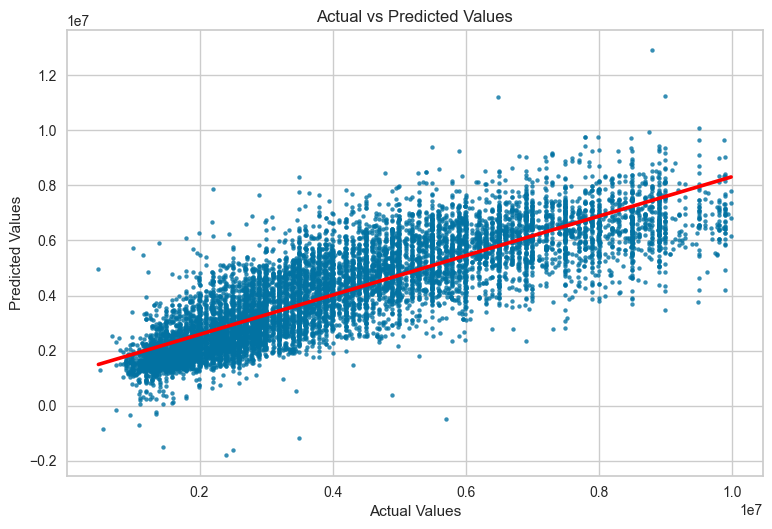

In [173]:
# Model evaluation: Predicted values vs. Actual values

# Create regression plot of actual and predicted values
sns.regplot(x=y_train, y=y_train_poly_opt_lasso_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Set x label
plt.xlabel('Actual Values')

# Set y label
plt.ylabel('Predicted Values')

# Set title
plt.title('Actual vs Predicted Values')
plt.show()

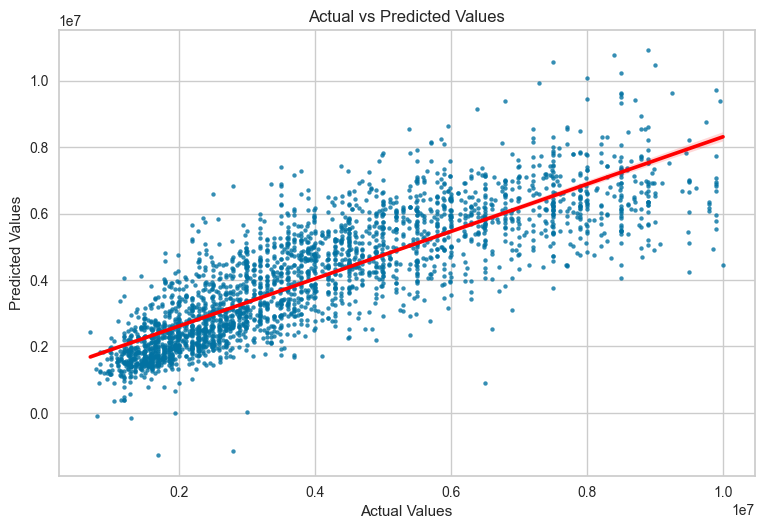

In [174]:
# Model evaluation: Predicted values vs. Actual values

# Create regression plot of actual and predicted values
sns.regplot(x=y_valid, y=y_valid_poly_opt_lasso_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Set x label
plt.xlabel('Actual Values')

# Set y label
plt.ylabel('Predicted Values')

# Set title
plt.title('Actual vs Predicted Values')
plt.show()

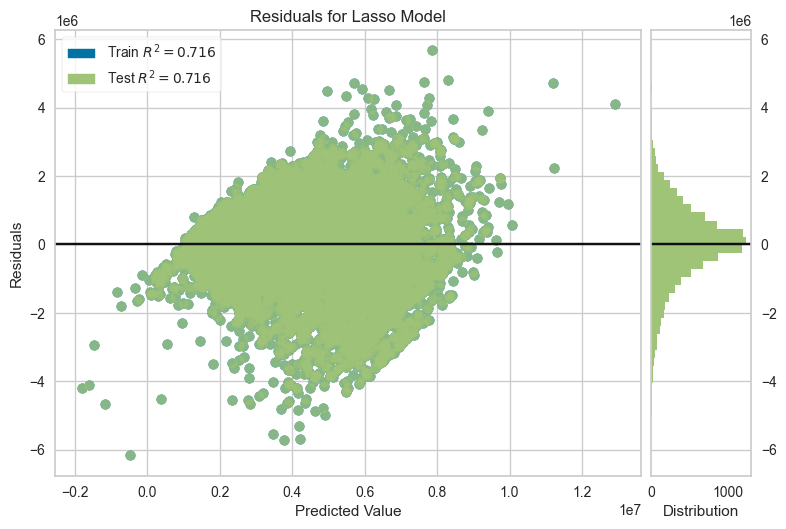

In [178]:
# Model evaluation: Predicted values vs. Actual values

# Initiate residuals plot
visualizer = ResidualsPlot(opt_lasso_reg)

# Fit the train data
visualizer.fit(X_train_poly, y_train)

# Generate the score
visualizer.score(X_train_poly, y_train)
visualizer.show();

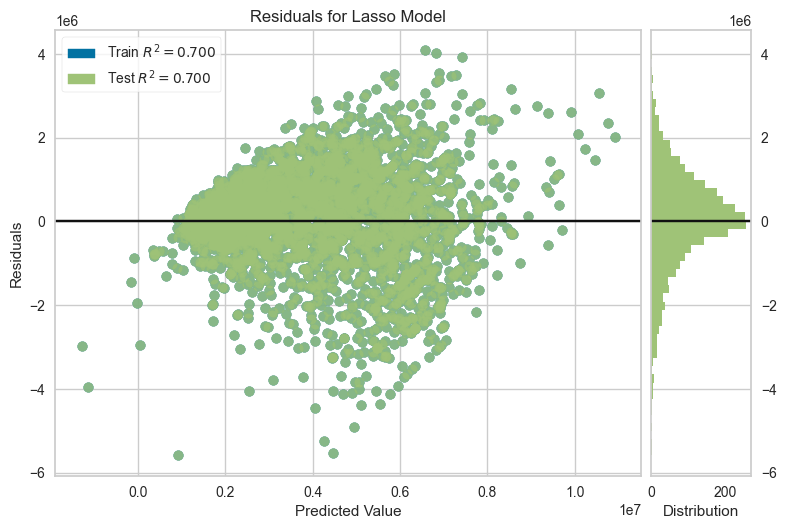

In [179]:
# Model evaluation: Predicted values vs. Actual values

# Initiate residual plot
visualizer = ResidualsPlot(opt_lasso_reg)

# Fit the validation data
visualizer.fit(X_valid_poly, y_valid)

# Generate the score
visualizer.score(X_valid_poly, y_valid)
visualizer.show();

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/22028384.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_valid, hist=False, color="r", label='Actual Values')
/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/22028384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

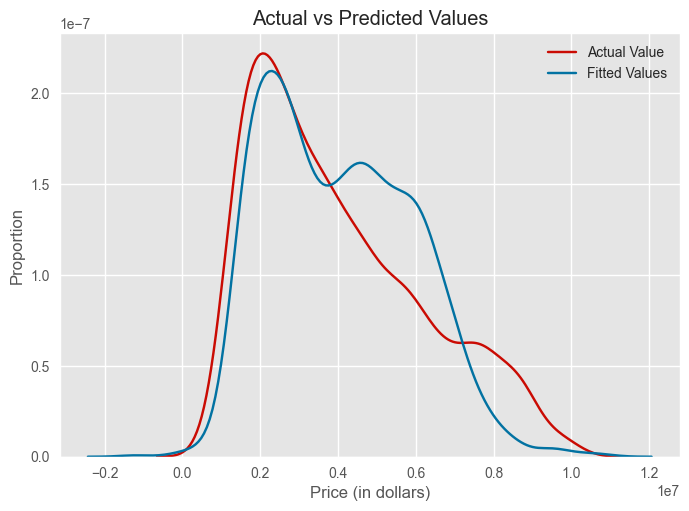

In [111]:
# Model evaluation: actual vs. predicted values

# Create distribution plot of the actual values
ax1 = sns.distplot(y_valid, hist=False, color="r", label='Actual Values')

# Create distribution plot of the predicted values
sns.distplot(y_valid_poly_opt_lasso_pred, hist=False, color="b", label='Predicted Values' , ax=ax1)

# Set title
plt.title('Actual vs Predicted Values')

# Set x label
plt.xlabel('Price (in dollars)')

# Set y label
plt.ylabel('Proportion')

# Create labels
labels = ["Actual Value", "Fitted Values"]
plt.legend(labels=labels)
plt.show()
plt.close();

**Regularization Lasso: Analysis**
- Lasso produced a better score than Ridge regularization, a slightly better score than Ridge

## Regularization: ElasticNet

In [114]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

# Create a KFold object with 5 folds.
cv = KFold(n_splits=15)

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=cv)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train_poly, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_valid_poly)
enet_model_preds_train = enet_model.predict(X_train_poly)

# Evaluate model.
print(enet_model.score(X_train_poly, y_train))
print(enet_model.score(X_valid_poly, y_valid))

0.6575774224070181
0.6448924379011504


In [118]:
# Print out R squared score and RMSE score of y_train and enet_model_preds
print("R-Square Train: ", r2_score(y_train, enet_model_preds_train))
print("R-Square Validation: ",r2_score(y_valid, enet_model_preds))
print("="*50)
print("RMSE of Train :", mean_squared_error(y_train, y_train_poly_opt_lasso_pred, squared=False))
print("RMSE of Validation  :", mean_squared_error(y_valid, y_valid_poly_opt_lasso_pred, squared=False))

R-Square Train:  0.6575774224070181
R-Square Validation:  0.6448924379011504
RMSE of Train : 1164186.702791857
RMSE of Validation  : 1201116.2875446773


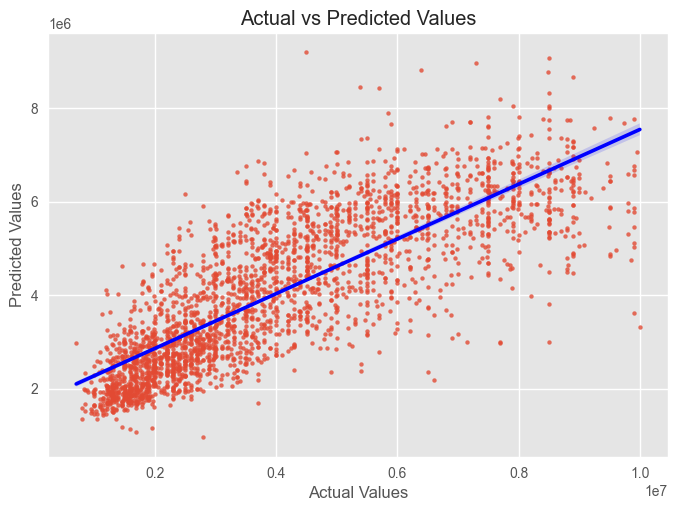

In [116]:
# Model evaluation: Predicted values vs. Actual values

# Create regression plot
sns.regplot(x=y_valid, y=enet_model_preds, scatter_kws={'s': 10}, line_kws={'color': 'blue'})

# Set x label
plt.xlabel('Actual Values')

# Set y label
plt.ylabel('Predicted Values')

# Set title
plt.title('Actual vs Predicted Values')
plt.show()

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/3222491311.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_valid, hist=False, color="r", label='Actual Values')
/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/3222491311.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

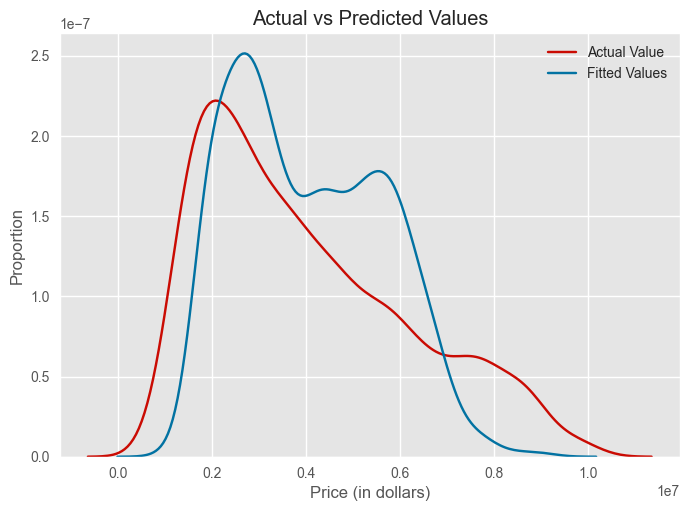

In [117]:
# Model evaluation: Predicted values vs. Actual values

# Create distribution plot of validated values
ax1 = sns.distplot(y_valid, hist=False, color="r", label='Actual Values')

# Created distribution plot of predicted values
sns.distplot(enet_model_preds, hist=False, color="b", label='Predicted Values' , ax=ax1)

# Set title
plt.title('Actual vs Predicted Values')

# Set x label
plt.xlabel('Price (in dollars)')

# Set y label
plt.ylabel('Proportion')

# Create labels
labels = ["Actual Value", "Fitted Values"]

# Set legend
plt.legend(labels=labels)
plt.show()
plt.close();

**ElasticNet Regularization: Analysis**
- The score and performance is lower than Lasso regularization


**All Regularization Techniques Evaluation**
- Regularization with Lasso yields the best performed model
- R-Square Train:  0.7155729299162299
- R-Square Validation:  0.7002846888592379
- RMSE of Train : 1164186.702791857
- RMSE of Validation  : 1201116.2875446773

## Final Model Fitting and Evaluation

- Final model chosen is opt_lasso_reg:
- R-Square Train:  0.7155729299162299
- R-Square Validation:  0.7002846888592379


In [120]:
# Fit X_train_poly and y_train using opt_lasso_reg
opt_lasso_reg.fit(X_train_poly, y_train)

Lasso(alpha=10)

In [121]:
# Predict train data with opt_lasso_reg model
pred_train = opt_lasso_reg.predict(X_train_poly)

In [122]:
# Predict valid data with opt_lasso_reg model
pred_valid = opt_lasso_reg.predict(X_valid_poly)

In [123]:
# R2 and RMSE of opt_lasso_reg model
print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of valid :",  r2_score(y_valid, pred_valid))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_valid, pred_valid, squared=False))

R2 Score of train : 0.7155729299162299
R2 Score of valid : 0.7002846888592379

RMSE of train : 1164186.702791857
RMSE of test  : 1201116.2875446773


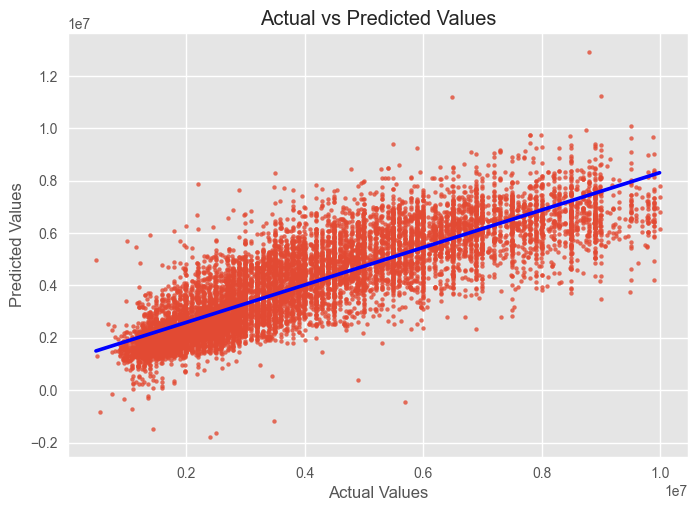

In [128]:
# Model evaluation: Predicted values vs. Actual values

# Create regression plot of actual and predicted values
sns.regplot(x=y_train, y=pred_train, scatter_kws={'s': 10}, line_kws={'color': 'blue'})

# Set x label
plt.xlabel('Actual Values')

# Set y label
plt.ylabel('Predicted Values')

# Set title
plt.title('Actual vs Predicted Values')
plt.show()

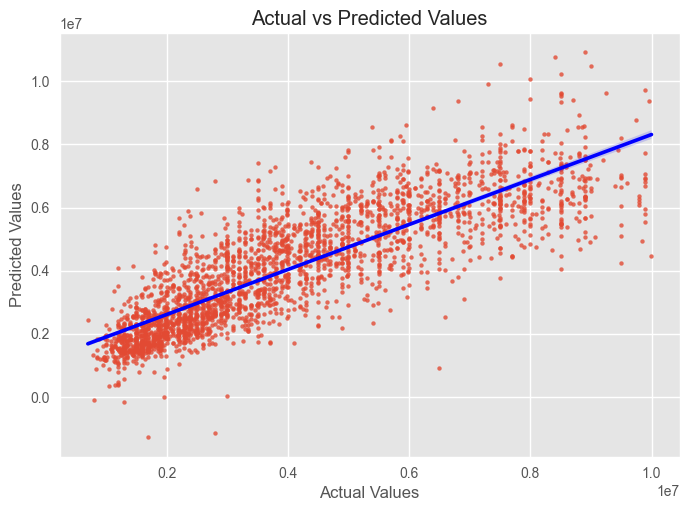

In [129]:
# Model evaluation: Predicted values vs. Actual values

# Create regression plot of actual and predicted values
sns.regplot(x=y_valid, y=pred_valid, scatter_kws={'s': 10}, line_kws={'color': 'blue'})

# Set x label
plt.xlabel('Actual Values')

# Set y label
plt.ylabel('Predicted Values')

# Set title
plt.title('Actual vs Predicted Values')
plt.show()

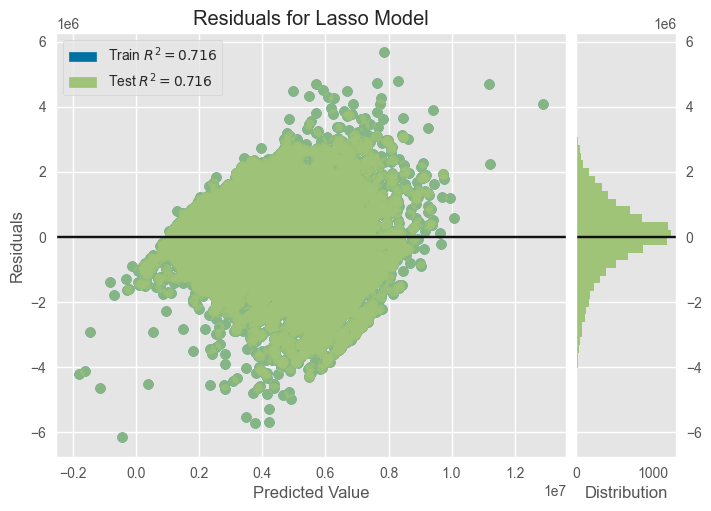

In [126]:
# Initiate residual plot
visualizer = ResidualsPlot(opt_lasso_reg)

# Fit train data
visualizer.fit(X_train_poly, y_train)

# Generate score
visualizer.score(X_train_poly, y_train)
visualizer.show();

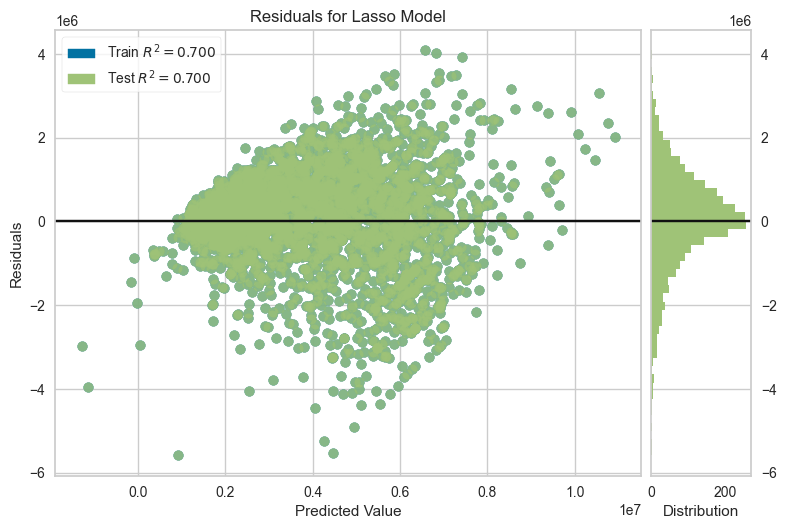

In [191]:
# Initiate residual plot
visualizer = ResidualsPlot(opt_lasso_reg)

# Fit validated data
visualizer.fit(X_valid_poly, y_valid)

# Generate the score
visualizer.score(X_valid_poly, y_valid)
visualizer.show();

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/2300220603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_valid, hist=False, color="r", label='Actual Values')
/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_1309/2300220603.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

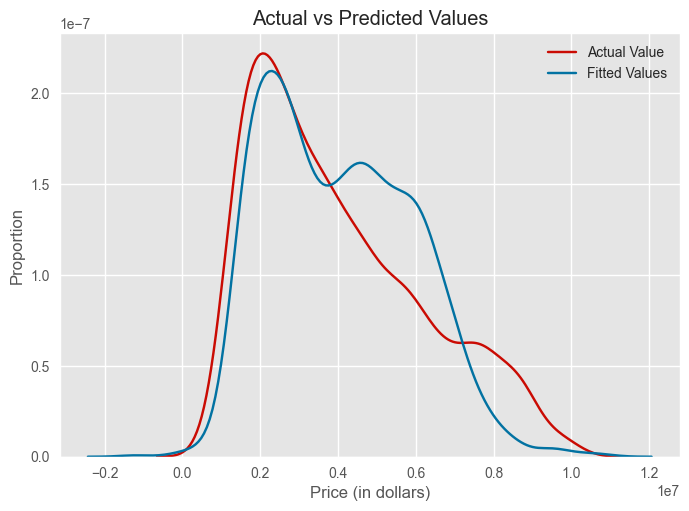

In [163]:
# Create distribution plot of actual values
ax1 = sns.distplot(y_valid, hist=False, color="r", label='Actual Values')

# Create distribution plot of predicted values
sns.distplot(pred_valid, hist=False, color="b", label='Predicted Values' , ax=ax1)

# Set title
plt.title('Actual vs Predicted Values')

# Set x label
plt.xlabel('Price (in dollars)')

# Set y label
plt.ylabel('Proportion')

# Create labels
labels = ["Actual Value", "Fitted Values"]

# Set legend
plt.legend(labels=labels)

plt.show()
plt.close();

## Test Data

In [131]:
# Import test data
test_df = pd.read_json('test.json')

In [132]:
# Print head of test data
test_df.head()

id      province     district      subdistrict  \
0  10317868  Samut Prakan    Bang Phli    Bang Phli Yai   
1  10885829       Bangkok   Nong Khaem  Nong Khang Phlu   
2  10765951       Bangkok  Huai Khwang      Huai Khwang   
3  10003549       Bangkok  Khlong Toei       Khlong Tan   
4  10663026       Bangkok       Lak Si  Thung Song Hong   

                         address   property_type  total_units  bedrooms  \
0             Nam Daeng Road Yai  Detached House        800.0       4.0   
1                 Machareon Road  Detached House        107.0       4.0   
2                      72 Rama 9           Condo        433.0       1.0   
3  772 Sukhumvit Road, Khong Tan           Condo        656.0       1.0   
4           222 Ngamwongwan Road           Condo       1458.0       1.0   

   baths  floor_area  ...   latitude   longitude  nearby_stations  \
0    3.0         120  ...  13.614196  100.680610                0   
1    3.0         188  ...  13.702222  100.341833                0   
2    1.0          22  ...  13.755713  100.566385                3   
3    1.0          41  ...  13.724295  100.577202                1   
4    1.0          29  ...  13.855437  100.547923                0   

                             nearby_station_distance  nearby_bus_stops  \
0                                               None               NaN   
1                                               None              20.0   
2  [[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...               NaN   
3                            [[E6 Thong Lo BTS, 70]]              20.0   
4                                               None              20.0   

  nearby_supermarkets  nearby_shops  year_built  month_built  \
0                 9.0             5           0         None   
1                 9.0             5        2020         None   
2                13.0            20        2015    September   
3                16.0            20        2013         June   
4                10.0            14        2012    September   

                                          facilities  
0  [Clubhouse, Community Garden, CCTV, Pavillion,...  
1  [Car Park, Clubhouse, Community Garden, CCTV, ...  
2  [Covered car park, CCTV, Fitness corner, 24 ho...  
3  [Car Park, Covered car park, CCTV, Fitness cor...  
4  [Covered car park, CCTV, Fitness corner, 24 ho...  

[5 rows x 22 columns]

In [133]:
# Print shape of test data
test_df.shape

(2500, 22)

In [134]:
# Encode test data district column
test_df['district'] = test_df['district'].map(district_encode_dict)

In [135]:
# Encode test data subdistrict column
test_df['subdistrict'] = test_df['subdistrict'].map(subdistrict_encode_dict)

In [136]:
# Encode test data province column
test_df['province'] = test_df['province'].map(province_encode_dict)

In [137]:
# Encode test data property type column
test_df['property_type'] = test_df['property_type'].map(property_type_encode_dict)

In [138]:
# Map test data month built column
test_df['month_built'] = test_df['month_built'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

In [139]:
# Create count faciilities column 
test_df['count_facilities'] = test_df['facilities'].str.len()


In [140]:
# Create closest station name and closest station distance columns
def closest_station(station_list, return_value='station_name'):
    if type(station_list) != list:
        if return_value == 'station_name':
            return "NO STATION"
        elif return_value == 'station_distance':
            return 2000
    else:
        if return_value == 'station_name':
            return station_list[0][0]
        elif return_value == 'station_distance':
            return station_list[0][1]

test_df['closest_station_name'] = test_df.nearby_station_distance.apply(lambda x: closest_station(x, 'station_name'))
test_df['closest_station_distance'] = test_df.nearby_station_distance.apply(lambda x: closest_station(x, 'station_distance'))

In [141]:
# Select features
features = ['subdistrict', 'district', 'floor_area', 'baths',
            'property_type', 'nearby_shops', 'bedrooms',
            'province', 'nearby_stations', 'nearby_supermarkets',
            'floor_level', 'total_units', 'closest_station_distance']
           

In [142]:
# Create X_test
X_test=test_df[features]

In [143]:
# Transform X_test with knn imputer
X_test_knn = knn.transform(X_test)

In [144]:
# Transform X_test_knn with Standard Scaler
X_test_std = sc.transform(X_test_knn)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [145]:
# Transform X_test_std with poly regression feature
X_test_poly = poly_reg.transform(X_test_std)


In [146]:
# Prediction using opt_lasso_reg
pred_test = opt_lasso_reg.predict(X_test_poly)
pred_test[:10]

array([5316221.97971888, 6115612.06980467, 4184584.69779407,
       5598521.63038277, 2121032.20395044, 5463643.1850598 ,
       3572985.3385001 , 5056588.16711255, 3478315.75549322,
       3432030.28883995])

In [124]:
# Save as csv file
test_df['price'] = pred_test
test_df[['id','price']].to_csv('submission3.csv', index=False)